<a href="https://colab.research.google.com/github/eeolga/article/blob/main/131_138.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load and explore data

### Subtask:
Load the data from "131-138.xlsx" into a pandas DataFrame and perform initial exploration.


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel("131-138.xlsx")

# Display the first 5 rows
display(df.head())

# Display the last 5 rows
display(df.tail())

# Check for missing values
display(df.isnull().sum())

# Display data types and non-null counts
display(df.info())

,resource,activity,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i \n","logs,\n Li","log\nweight,\nL resource,i\n","time, \nT resource,i","time weight norm, \nW resource,i","success indicator,\nS recourse,i","success indicator norm,\nS norm,i"
0,1,131-12,233143.0,1,0.01,0.016949,22,0.005638,4.713338,2.356669,1.184547,0.029989
1,1,131-12,240718.0,1,0.01,0.016949,96,0.024603,4.713338,2.356669,1.188340,0.030085
2,1,Registering,293024.0,1,0.01,0.016949,10,0.002563,4.713338,2.356669,1.183932,0.029973
3,1,AutoCAD install,233140.0,1,0.01,0.016949,45,0.011533,4.713338,2.356669,1.185726,0.030018
4,1,Templates_dwg,233161.0,1,0.01,0.016949,21,0.005382,4.713338,2.356669,1.184496,0.029987


,resource,activity,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i \n","logs,\n Li","log\nweight,\nL resource,i\n","time, \nT resource,i","time weight norm, \nW resource,i","success indicator,\nS recourse,i","success indicator norm,\nS norm,i"
44,1,The 3rd homework models,3462.0,5,0.05,0.065789,328,0.038188,8.381579,4.190789,2.122769,0.053741
45,1,The 3rd homework files - control,258703.0,5,0.05,0.065789,1267,0.147514,8.381579,4.190789,2.144634,0.054295
46,1,Tasks for the test,4421.0,5,0.05,0.065789,88,0.010246,8.381579,4.190789,2.117181,0.053600
47,1,Test work assignment,233176.0,5,0.05,0.065789,1059,0.123297,8.381579,4.190789,2.139791,0.054172
48,24,NaN,NaN,76,0.76,1.000000,8589,1.000000,156.000000,78.000000,39.500000,1.000000


,0
resource,0
activity,2
resource_code,2
level,0
"level_scaled,\n li",0
"difficulty\nweight,\nDresource,i \n",0
"logs,\n Li",0
"log\nweight,\nL resource,i\n",0
"time, \nT resource,i",0
"time weight norm, \nW resource,i",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   resource                          49 non-null     int64  
 1   activity                          47 non-null     object 
 2   resource_code                     47 non-null     float64
 3   level                             49 non-null     int64  
 4   level_scaled,
 li                 49 non-null     float64
 5   difficulty
weight,
Dresource,i 
  49 non-null     float64
 6   logs,
 Li                         49 non-null     int64  
 7   log
weight,
L resource,i
         49 non-null     float64
 8   time,  
T resource,i              49 non-null     float64
 9   time weight norm, 
W resource,i   49 non-null     float64
 10  success indicator,
S recourse,i   49 non-null     float64
 11  success indicator norm,
S norm,i  49 non-null     float64
dtypes: float64

None

## Prepare data

### Subtask:
Handle any missing values, encode categorical features if necessary, and split the data into training and testing sets.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd # Import pandas as it is used in the cell

# 1. Strip leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# 2. Check the percentage of missing values
missing_percentage = df.isnull().sum() / len(df) * 100

# 3. If the 'resource_code' column exists and has more than 50% missing values, drop it.
if 'resource_code' in df.columns and missing_percentage['resource_code'] > 50:
    df = df.drop('resource_code', axis=1)
    print("Dropped 'resource_code' due to high missing values.")
else:
    print("'resource_code' column does not exist or does not have more than 50% missing values.")


# 4. Impute missing values for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Imputed missing values in '{col}' with median ({median_val}).")

# 5. Impute missing values for categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Imputed missing values in '{col}' with mode ({mode_val}).")

# Check missing values again after imputation
print("\nMissing values after imputation:")
print(df.isnull().sum())

# 6. Rename problematic column permanently
problematic_col_original = None
for col in df.columns:
    if 'log\nweight,\nL resource,i' in col:
        problematic_col_original = col
        break

if problematic_col_original:
    new_col_name = 'log_weight_L_resource_i'
    df = df.rename(columns={problematic_col_original: new_col_name})
    print(f"Renamed column '{problematic_col_original}' to '{new_col_name}'.")
else:
    print("Problematic column 'log\\nweight,\\nL resource,i' not found. Proceeding with original column names.")


# 7. Examine and encode 'activity' column
if 'activity' in df.columns:
    # Perform one-hot encoding
    df = pd.get_dummies(df, columns=['activity'], dummy_na=False)
    print("\nDataFrame after one-hot encoding 'activity' column:")
    display(df.head())
else:
    print("'activity' column not found in DataFrame. Skipping one-hot encoding for 'activity'.")


# 8. Define the target variable and create a binary outcome
# The target is 'success indicator norm, S norm,i'.
# Let's determine a threshold. A common approach is to use the median or mean, or a domain-specific value.
# Use the median as a simple threshold for success (1) vs failure (0).
median_success_norm = df['success indicator norm,\nS norm,i'].median()
df['success'] = (df['success indicator norm,\nS norm,i'] > median_success_norm).astype(int)

print(f"\nCreated binary target variable 'success' with threshold (median) = {median_success_norm}")
print("Value counts for the 'success' target variable:")
print(df['success'].value_counts())

# 9. Separate features (X) and target (y)
# Drop the original 'success indicator norm, S norm,i' and other potentially irrelevant columns
# Drop the original 'success indicator,\nS recourse,i' as we are using the normalized version.
# Drop the newly created 'success' column from features X
X = df.drop(['success indicator norm,\nS norm,i', 'success indicator,\nS recourse,i', 'success'], axis=1)
y = df['success']

print("\nFeatures (X) and Target (y) separated.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# 10. Split data into training and testing sets
# Use an 80/20 split and stratify by the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nData split into training and testing sets (80/20).")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

'resource_code' column does not exist or does not have more than 50% missing values.
Imputed missing values in 'resource_code' with median (233140.0).
Imputed missing values in 'activity' with mode (Templates_dwg).

Missing values after imputation:
resource                             0
activity                             0
resource_code                        0
level                                0
level_scaled,\n li                   0
difficulty\nweight,\nDresource,i     0
logs,\n Li                           0
log\nweight,\nL resource,i           0
time,  \nT resource,i                0
time weight norm, \nW resource,i     0
success indicator,\nS recourse,i     0
success indicator norm,\nS norm,i    0
dtype: int64
Renamed column 'log
weight,
L resource,i' to 'log_weight_L_resource_i'.

DataFrame after one-hot encoding 'activity' column:


/tmp/ipython-input-471521252.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipython-input-471521252.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i","success indicator,\nS recourse,i",...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
0,1,233143.0,1,0.01,0.016949,22,0.005638,4.713338,2.356669,1.184547,...,False,False,False,False,False,False,False,False,False,False
1,1,240718.0,1,0.01,0.016949,96,0.024603,4.713338,2.356669,1.188340,...,False,False,False,False,False,False,False,False,False,False
2,1,293024.0,1,0.01,0.016949,10,0.002563,4.713338,2.356669,1.183932,...,False,False,False,False,False,False,False,False,False,False
3,1,233140.0,1,0.01,0.016949,45,0.011533,4.713338,2.356669,1.185726,...,False,False,False,False,False,False,False,False,False,False
4,1,233161.0,1,0.01,0.016949,21,0.005382,4.713338,2.356669,1.184496,...,False,False,False,False,False,False,False,False,False,False



Created binary target variable 'success' with threshold (median) = 0.04039769466375852
Value counts for the 'success' target variable:
success
0    25
1    24
Name: count, dtype: int64

Features (X) and Target (y) separated.
Shape of X: (49, 47)
Shape of y: (49,)

Data split into training and testing sets (80/20).
Shape of X_train: (39, 47)
Shape of X_test: (10, 47)
Shape of y_train: (39,)
Shape of y_test: (10,)


## Scale features

### Subtask:
Scale the numerical features of the training and testing data using StandardScaler.


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd # Import pandas if not already imported

# Identify numerical and categorical features
numerical_features = X_train.select_dtypes(include=np.number).columns
categorical_features = X_train.select_dtypes(include='bool').columns # One-hot encoded columns are boolean

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing numerical data
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_features])
X_test_scaled_numerical = scaler.transform(X_test[numerical_features])

# Convert scaled numerical arrays back to DataFrames with original column names
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_features, index=X_train.index)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_features, index=X_test.index)

# Get the categorical columns from the original X_train and X_test
X_train_categorical_df = X_train[categorical_features]
X_test_categorical_df = X_test[categorical_features]

# Concatenate the scaled numerical features and the one-hot encoded categorical features
X_train_processed = pd.concat([X_train_scaled_numerical_df, X_train_categorical_df], axis=1)
X_test_processed = pd.concat([X_test_scaled_numerical_df, X_test_categorical_df], axis=1)


print("Numerical and categorical features combined successfully.")
print("\nShape of processed X_train:", X_train_processed.shape)
print("Shape of processed X_test:", X_test_processed.shape)

display(X_train_processed.head())

Numerical and categorical features combined successfully.

Shape of processed X_train: (39, 47)
Shape of processed X_test: (10, 47)


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
11,0.0,-1.181258,-0.620466,-0.620466,-0.426165,-0.363262,-0.197105,-0.384527,-0.384527,False,...,False,False,False,False,True,False,False,False,False,False
38,0.0,-1.192000,0.070910,0.070910,-0.172805,-0.007406,-0.205044,-0.214169,-0.214169,False,...,False,False,False,False,False,False,False,False,False,False
2,0.0,1.250654,-1.311842,-1.311842,-1.196380,-0.645174,-0.665107,-1.151686,-1.151686,False,...,False,False,False,False,False,False,False,False,False,False
8,0.0,-1.201705,-0.620466,-0.620466,-0.426165,-0.451071,-0.342876,-0.384527,-0.384527,False,...,False,False,False,False,False,False,False,False,False,False
42,0.0,-1.190896,1.453663,1.453663,1.023055,-0.384059,-0.489111,0.976947,0.976947,False,...,False,False,False,False,False,False,False,False,False,False


## Build and train models

### Subtask:
Build and train  the Logistic Regression, Decision Tree, and Random Forest models. This involves importing the necessary classes from scikit-learn, instantiating each model with a specified random state (and n_estimators for Random Forest), and then training each model using the scaled training data (X_train and y_train). These steps can be combined into a single code block.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Logistic Regression model
model = LogisticRegression(random_state=42)
print("Logistic Regression model defined.")

# Instantiate the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
print("Decision Tree Classifier defined.")

# Instantiate the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
print("Random Forest Classifier defined.")

# Train the Logistic Regression model
model.fit(X_train, y_train)
print("Logistic Regression model trained.")

# Train the Decision Tree Classifier
dt_model.fit(X_train, y_train)
print("Decision Tree Classifier trained.")

# Train the Random Forest Classifier
rf_model.fit(X_train, y_train)
print("Random Forest Classifier trained.")

Logistic Regression model defined.
Decision Tree Classifier defined.
Random Forest Classifier defined.
Logistic Regression model trained.
Decision Tree Classifier trained.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Classifier trained.


## Perform cross-validation

### Subtask:
Perform 5-fold cross-validation on the Logistic Regression, Decision Tree, and Random Forest models using accuracy and F1-score as metrics and print the results.


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 5-fold cross-validation for Logistic Regression
cv_scores_lr_accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
cv_scores_lr_f1 = cross_val_score(model, X, y, cv=5, scoring='f1')

print("Logistic Regression - Cross-Validation Accuracy Scores per fold:")
print(cv_scores_lr_accuracy)
print(f"Logistic Regression - Average Cross-Validation Accuracy: {np.mean(cv_scores_lr_accuracy):.4f}")
print(f"Logistic Regression - Standard Deviation of Accuracy Scores: {np.std(cv_scores_lr_accuracy):.4f}")

print("\nLogistic Regression - Cross-Validation F1-scores per fold:")
print(cv_scores_lr_f1)
print(f"Logistic Regression - Average Cross-Validation F1-score: {np.mean(cv_scores_lr_f1):.4f}")
print(f"Logistic Regression - Standard Deviation of F1-scores: {np.std(cv_scores_lr_f1):.4f}")


# Perform 5-fold cross-validation for Decision Tree
cv_scores_dt_accuracy = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
cv_scores_dt_f1 = cross_val_score(dt_model, X, y, cv=5, scoring='f1')

print("\nDecision Tree - Cross-Validation Accuracy Scores per fold:")
print(cv_scores_dt_accuracy)
print(f"Decision Tree - Average Cross-Validation Accuracy: {np.mean(cv_scores_dt_accuracy):.4f}")
print(f"Decision Tree - Standard Deviation of Accuracy Scores: {np.std(cv_scores_dt_accuracy):.4f}")

print("\nDecision Tree - Cross-Validation F1-scores per fold:")
print(cv_scores_dt_f1)
print(f"Decision Tree - Average Cross-Validation F1-score: {np.mean(cv_scores_dt_f1):.4f}")
print(f"Decision Tree - Standard Deviation of F1-scores: {np.std(cv_scores_dt_f1):.4f}")


# Perform 5-fold cross-validation for Random Forest
cv_scores_rf_accuracy = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
cv_scores_rf_f1 = cross_val_score(rf_model, X, y, cv=5, scoring='f1')

print("\nRandom Forest - Cross-Validation Accuracy Scores per fold:")
print(cv_scores_rf_accuracy)
print(f"Random Forest - Average Cross-Validation Accuracy: {np.mean(cv_scores_rf_accuracy):.4f}")
print(f"Random Forest - Standard Deviation of Accuracy Scores: {np.std(cv_scores_rf_accuracy):.4f}")

print("\nRandom Forest - Cross-Validation F1-scores per fold:")
print(cv_scores_rf_f1)
print(f"Random Forest - Average Cross-Validation F1-score: {np.mean(cv_scores_rf_f1):.4f}")
print(f"Random Forest - Standard Deviation of F1-scores: {np.std(cv_scores_rf_f1):.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression - Cross-Validation Accuracy Scores per fold:
[0.6        1.         0.8        1.         0.77777778]
Logistic Regression - Average Cross-Validation Accuracy: 0.8356
Logistic Regression - Standard Deviation of Accuracy Scores: 0.1511

Logistic Regression - Cross-Validation F1-scores per fold:
[0.33333333 1.         0.75       1.         0.8       ]
Logistic Regression - Average Cross-Validation F1-score: 0.7767
Logistic Regression - Standard Deviation of F1-scores: 0.2439

Decision Tree - Cross-Validation Accuracy Scores per fold:
[1.         1.         0.6        0.9        0.77777778]
Decision Tree - Average Cross-Validation Accuracy: 0.8556
Decision Tree - Standard Deviation of Accuracy Scores: 0.1517

Decision Tree - Cross-Validation F1-scores per fold:
[1.         1.         0.33333333 0.88888889 0.8       ]
Decision Tree - Average Cross-Validation F1-score: 0.8044
Decision Tree - Standard Deviation of F1-scores: 0.2472

Random Forest - Cross-Validation Accurac

## Compare model performance

### Subtask:
Display and compare the average cross-validation accuracy and F1-scores for all evaluated models.


In [ ]:
# Display the average cross-validation scores for all models

print("--- Cross-Validation Performance Comparison ---")
print(f"Logistic Regression - Average Accuracy: {cv_scores_lr_accuracy.mean():.4f}")
print(f"Logistic Regression - Average F1-score: {cv_scores_lr_f1.mean():.4f}")
print("-" * 40)
print(f"Decision Tree - Average Accuracy: {cv_scores_dt_accuracy.mean():.4f}")
print(f"Decision Tree - Average F1-score: {cv_scores_dt_f1.mean():.4f}")
print("-" * 40)
print(f"Random Forest - Average Accuracy: {cv_scores_rf_accuracy.mean():.4f}")
print(f"Random Forest - Average F1-score: {cv_scores_rf_f1.mean():.4f}")
print("---------------------------------------------")

--- Cross-Validation Performance Comparison ---
Logistic Regression - Average Accuracy: 0.8356
Logistic Regression - Average F1-score: 0.7767
----------------------------------------
Decision Tree - Average Accuracy: 0.8556
Decision Tree - Average F1-score: 0.8044
----------------------------------------
Random Forest - Average Accuracy: 0.8756
Random Forest - Average F1-score: 0.8267
---------------------------------------------


## Evaluate models on test set

### Subtask:
Evaluate the trained models' performance using the testing data and appropriate metrics.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Evaluate Logistic Regression model on original test set
y_pred_lr = model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Logistic Regression Model Accuracy on the original test set: {accuracy_lr:.4f}")
print(f"Logistic Regression Model F1-score on the original test set: {f1_lr:.4f}")

# Evaluate Logistic Regression model on processed test set
y_pred_lr_processed = model.predict(X_test_processed)
accuracy_lr_processed = accuracy_score(y_test, y_pred_lr_processed)
f1_lr_processed = f1_score(y_test, y_pred_lr_processed)

print(f"\nLogistic Regression Model Accuracy on the processed test set: {accuracy_lr_processed:.4f}")
print(f"Logistic Regression Model F1-score on the processed test set: {f1_lr_processed:.4f}")

# Evaluate Decision Tree model
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"\nDecision Tree Model Accuracy on the test set: {accuracy_dt:.4f}")
print(f"Decision Tree Model F1-score on the test set: {f1_dt:.4f}")

# Evaluate Random Forest model on the original test set
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"\nRandom Forest Model Accuracy on the original test set: {accuracy_rf:.4f}")
print(f"Random Forest Model F1-score on the original test set: {f1_rf:.4f}")

# Evaluate Random Forest model on processed test set
y_pred_rf_processed = rf_model.predict(X_test_processed)
accuracy_rf_processed = accuracy_score(y_test, y_pred_rf_processed)
f1_rf_processed = f1_score(y_test, y_pred_rf_processed)

print(f"\nRandom Forest Model Accuracy on the processed test set: {accuracy_rf_processed:.4f}")
print(f"Random Forest Model F1-score on the processed test set: {f1_rf_processed:.4f}")

Logistic Regression Model Accuracy on the original test set: 1.0000
Logistic Regression Model F1-score on the original test set: 1.0000

Logistic Regression Model Accuracy on the processed test set: 0.8000
Logistic Regression Model F1-score on the processed test set: 0.7500

Decision Tree Model Accuracy on the test set: 1.0000
Decision Tree Model F1-score on the test set: 1.0000

Random Forest Model Accuracy on the original test set: 1.0000
Random Forest Model F1-score on the original test set: 1.0000

Random Forest Model Accuracy on the processed test set: 0.7000
Random Forest Model F1-score on the processed test set: 0.5714


## Analyze feature importance

### Subtask:
Analyze feature importance


In [ ]:
import pandas as pd

# Get the coefficients of the trained model
coefficients = model.coef_[0]

# Get the feature names from the training data
feature_names = X_train.columns

# Create a pandas Series to easily view coefficients with their feature names
feature_importance = pd.Series(coefficients, index=feature_names)

# Sort the features by the absolute value of their coefficients
sorted_feature_importance = feature_importance.abs().sort_values(ascending=False)

# Display the most influential features (e.g., the top 10)
print("Most influential features (sorted by absolute coefficient value):")
print(sorted_feature_importance.head(10))

# Optionally, display all features and their coefficients
print("\nAll feature coefficients:")
print(feature_importance.sort_values(key=abs, ascending=False))

Most influential features (sorted by absolute coefficient value):
level                                     2.064456
resource                                  0.976736
time,  \nT resource,i                     0.476190
activity_The 1st homework files           0.324446
activity_Templates_dwg                    0.291951
time weight norm, \nW resource,i          0.238095
activity_Introduction, simplest solids    0.211361
activity_Exercises 1-2                    0.208123
activity_The 1st homework tasks           0.203897
activity_Exercises with details           0.200908
dtype: float64

All feature coefficients:
level                                          2.064456e+00
resource                                      -9.767356e-01
time,  \nT resource,i                         -4.761905e-01
activity_The 1st homework files               -3.244464e-01
activity_Templates_dwg                        -2.919512e-01
time weight norm, \nW resource,i              -2.380952e-01
activity_Introduction,

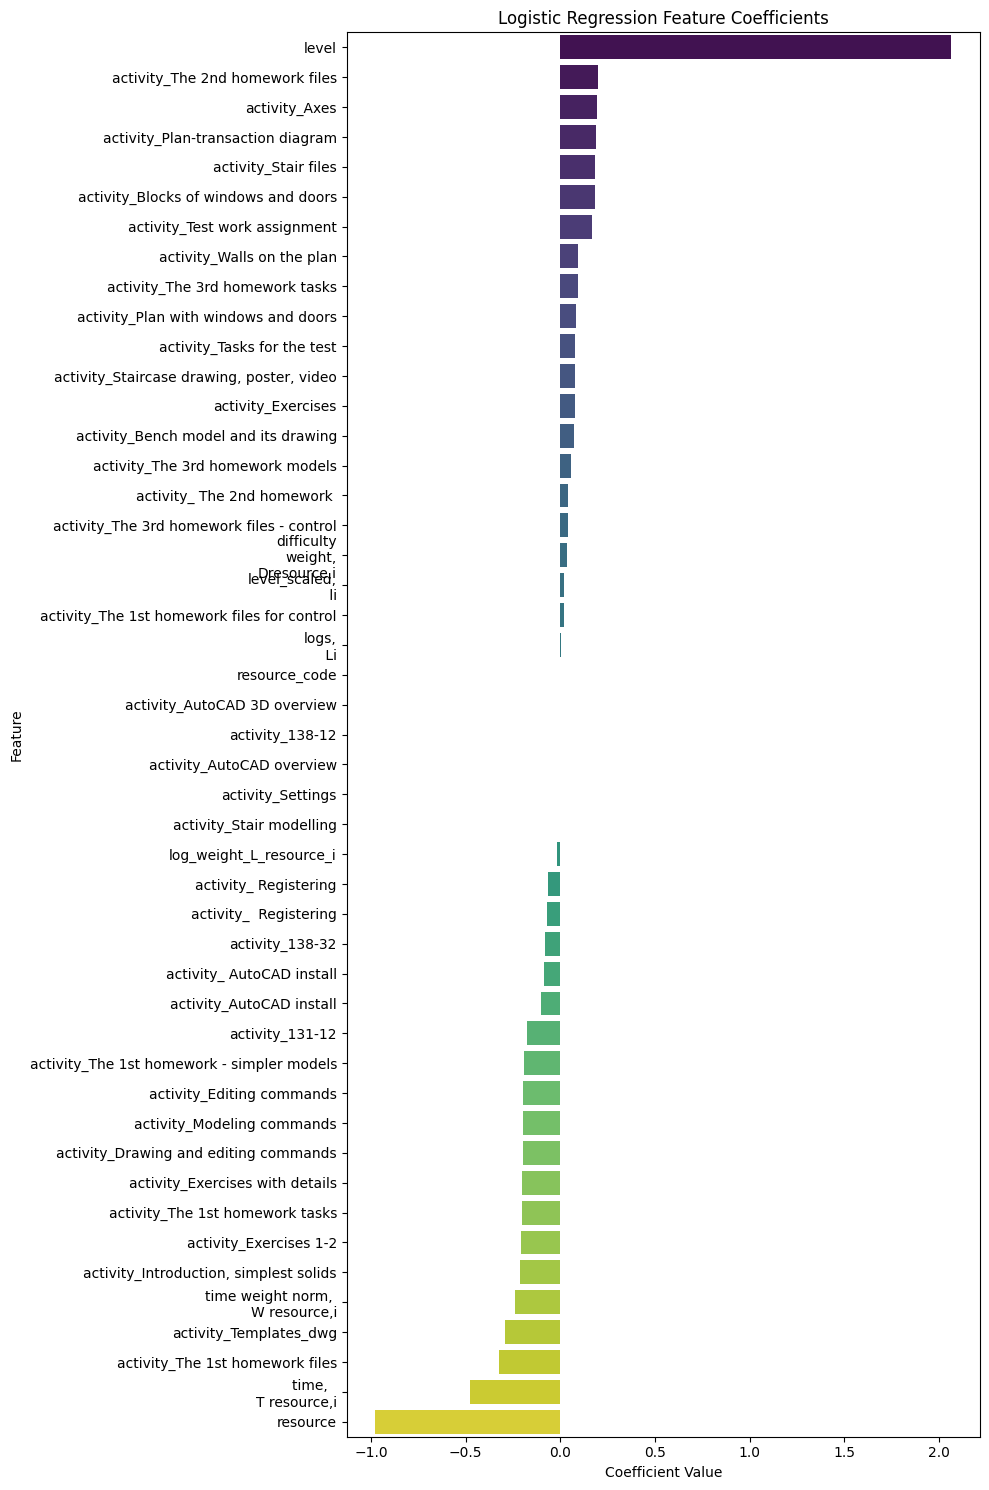

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the feature importance by value (not absolute value) for better visualization of positive/negative influence
sorted_feature_importance_plot = feature_importance.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 15))
sns.barplot(x=sorted_feature_importance_plot.values, y=sorted_feature_importance_plot.index, palette='viridis', hue=sorted_feature_importance_plot.index, legend=False)
plt.title('Logistic Regression Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Predict on new data

### Subtask:
Demonstrate how to use the trained model for predictive analytics on new student data.

Create sample new student data, ensure columns match training data, scale numerical features, and use the trained Logistic Regression model to predict success probabilities and class labels, then display the results.

In [ ]:
# Create sample new student data (replace with actual new data)
# The new data should have the same columns as the original X before dropping 'resource_code' and one-hot encoding
# For demonstration, let's create a few sample rows

# Create a dictionary with all columns from the original X (before dropping 'resource_code' and encoding 'activity')
# Ensure correct handling of numerical and object types based on original X dtypes
sample_data_dict = {}
for col in X.columns: # Use the original X here to ensure all original columns are present
    if X[col].dtype in [np.number]:
        sample_data_dict[col] = [0.0] * 3
    elif X[col].dtype == 'object':
         sample_data_dict[col] = [''] * 3
    else: # Handle other potential dtypes if necessary
         sample_data_dict[col] = [''] * 3


# Fill in the sample data for the specific students based on original column names
# Student 1
sample_data_dict['resource'][0] = 1.0
sample_data_dict['resource_code'][0] = 233143.0
sample_data_dict['level'][0] = 2.0
sample_data_dict['level_scaled,\n li'][0] = 0.02
sample_data_dict['difficulty\nweight,\nDresource,i'][0] = 0.03
sample_data_dict['logs,\n Li'][0] = 50.0
sample_data_dict['log\nweight,\nL resource,i'][0] = 0.01 # Use the original column name
sample_data_dict['time,  \nT resource,i'][0] = 5.0
sample_data_dict['time weight norm, \nW resource,i'][0] = 2.5
sample_data_dict['activity'][0] = '131-12' # Example activity


# Student 2
sample_data_dict['resource'][1] = 1.0
sample_data_dict['resource_code'][1] = 240718.0
sample_data_dict['level'][1] = 4.0
sample_data_dict['level_scaled,\n li'][1] = 0.04
sample_data_dict['difficulty\nweight,\nDresource,i'][1] = 0.07
sample_data_dict['logs,\n Li'][1] = 200.0
sample_data_dict['log\nweight,\nL resource,i'][1] = 0.03 # Use the original column name
sample_data_dict['time,  \nT resource,i'][1] = 10.0
sample_data_dict['time weight norm, \nW resource,i'][1] = 5.0
sample_data_dict['activity'][1] = 'Exercises' # Example activity

# Student 3
sample_data_dict['resource'][2] = 1.0
sample_data_dict['resource_code'][2] = 293024.0
sample_data_dict['level'][2] = 1.0
sample_data_dict['level_scaled,\n li'][2] = 0.01
sample_data_dict['difficulty\nweight,\nDresource,i'][2] = 0.01
sample_data_dict['logs,\n Li'][2] = 10.0
sample_data_dict['log\nweight,\nL resource,i'][2] = 0.005 # Use the original column name
sample_data_dict['time,  \nT resource,i'][2] = 3.0
sample_data_dict['time weight norm, \nW resource,i'][2] = 1.5
sample_data_dict['activity'][2] = 'Templates_dwg' # Example activity


new_student_data = pd.DataFrame(sample_data_dict)

print("Original New Student Data:")
display(new_student_data)


# Apply the same preprocessing steps as the training data

# 1. Drop 'resource_code' column
if 'resource_code' in new_student_data.columns:
    new_student_data = new_student_data.drop('resource_code', axis=1)
    print("\nDropped 'resource_code' column from new data.")

# 2. Rename problematic column permanently
problematic_col_original = None
for col in new_student_data.columns:
    if 'log\nweight,\nL resource,i' in col:
        problematic_col_original = col
        break

if problematic_col_original:
    new_col_name = 'log_weight_L_resource_i'
    new_student_data = new_student_data.rename(columns={problematic_col_original: new_col_name})
    print(f"Renamed column '{problematic_col_original}' to '{new_col_name}' in new data.")
else:
    print("Problematic column 'log\\nweight,\\nL resource,i' not found in new data. Proceeding with original column names.")


# 3. One-hot encode 'activity' column - need to ensure all categories from training are present
if 'activity' in new_student_data.columns:
    # To ensure consistent columns after one-hot encoding, we need to use the categories
    # learned from the training data. The simplest way is to concatenate with the
    # training data before encoding and then split back.
    # However, a safer way for prediction is to use reindex after encoding
    # to align columns with X_train_processed.

    new_student_data_encoded = pd.get_dummies(new_student_data, columns=['activity'], dummy_na=False)

    # Align columns with X_train_processed - add missing columns (filled with 0) and drop extra ones
    new_student_data_processed = new_student_data_encoded.reindex(columns=X_train_processed.columns, fill_value=0)

    print("\nDataFrame after one-hot encoding 'activity' and aligning columns:")
    display(new_student_data_processed.head())

else:
    print("'activity' column not found in new data. Skipping one-hot encoding for 'activity'.")
    new_student_data_processed = new_student_data # If no activity column, just use the current data


# 4. Ensure the order of columns in new_student_data_processed matches X_train_processed
new_student_data_processed = new_student_data_processed[X_train_processed.columns]


# 5. Impute missing values if any still exist after encoding (should not happen with current data, but as a safeguard)
numerical_cols_processed = new_student_data_processed.select_dtypes(include=np.number).columns
for col in numerical_cols_processed:
    if new_student_data_processed[col].isnull().any():
        # Use the median from the original training data (X_train) before scaling
        # Find the corresponding original column name if it was renamed
        original_col_name = col
        # Check if the original column name exists in X_train before attempting to get the median
        if col == 'log_weight_L_resource_i':
             original_col_name = 'log\nweight,\nL resource,i' # Revert to original name to get median from X_train

        # Find the median from the original X_train for the corresponding column
        if original_col_name in X.columns: # Use original X to get the median from the full dataset
             median_val = X[original_col_name].median()
             new_student_data_processed[col].fillna(median_val, inplace=True)
             print(f"Imputed missing values in new data '{col}' with median ({median_val}) from original data.")
        else:
             print(f"Warning: Original data column '{original_col_name}' not found for imputation.")


# Check missing values in processed new data after imputation
print("\nMissing values in new_student_data_processed after imputation:")
print(new_student_data_processed.isnull().sum()[new_student_data_processed.isnull().sum() > 0]) # Print columns with NaNs


# Ensure no NaNs before proceeding
if new_student_data_processed.isnull().sum().sum() > 0:
    print("\nError: Missing values still present in new_student_data_processed after imputation. Cannot proceed with prediction.")
else:
    print("\nNo missing values found in new_student_data_processed. Proceeding with prediction using Random Forest.")

    # Use the trained Random Forest model to predict
    # The rf_model was trained on X_train_processed
    predicted_probabilities_rf = rf_model.predict_proba(new_student_data_processed)[:, 1] # Get probability of success (class 1)
    predicted_class_rf = rf_model.predict(new_student_data_processed)

    # Display the predictions
    print("\nPredicted Success Probability for New Students (using Random Forest model on processed data):")
    print(predicted_probabilities_rf)

    print("\nPredicted Class (0: Failure, 1: Success) for New Students (using Random Forest model on processed data):")
    print(predicted_class_rf)

Original New Student Data:


/tmp/ipython-input-506980142.py:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if X[col].dtype in [np.number]:


,resource,activity,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li","log\nweight,\nL resource,i","time, \nT resource,i","time weight norm, \nW resource,i"
0,1.0,131-12,233143.0,2.0,0.02,0.03,50.0,0.010,5.0,2.5
1,1.0,Exercises,240718.0,4.0,0.04,0.07,200.0,0.030,10.0,5.0
2,1.0,Templates_dwg,293024.0,1.0,0.01,0.01,10.0,0.005,3.0,1.5



Dropped 'resource_code' column from new data.
Renamed column 'log
weight,
L resource,i' to 'log_weight_L_resource_i' in new data.

DataFrame after one-hot encoding 'activity' and aligning columns:


,resource,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,activity_ AutoCAD install,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
0,1.0,2.0,0.02,0.03,50.0,0.010,5.0,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,4.0,0.04,0.07,200.0,0.030,10.0,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,0.01,0.01,10.0,0.005,3.0,1.5,0,0,...,0,0,0,0,0,0,0,0,0,0



Missing values in new_student_data_processed after imputation:
Series([], dtype: int64)

No missing values found in new_student_data_processed. Proceeding with prediction using Random Forest.

Predicted Success Probability for New Students (using Random Forest model on processed data):
[0.9  0.96 0.9 ]

Predicted Class (0: Failure, 1: Success) for New Students (using Random Forest model on processed data):
[1 1 1]


## Save scaled data

### Subtask:
Save the scaled features and the target variable to a new Excel file.


In [ ]:
# Create pandas DataFrames from the scaled training and testing features
X_train_scaled_df = pd.DataFrame(X_train, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test, columns=X_test.columns)

# Add the target variable back to the scaled dataframes
# Ensure indices align - since X_train and y_train (and X_test and y_test)
# were created from the same split, their indices should match.
# If index issues arise, reset_index() could be used before adding the target.
train_scaled_data = X_train_scaled_df.copy()
train_scaled_data['success'] = y_train.values # Use .values to ensure alignment by position

test_scaled_data = X_test_scaled_df.copy()
test_scaled_data['success'] = y_test.values # Use .values to ensure alignment by position

# Initialize a pandas ExcelWriter and save to Excel files
try:
    with pd.ExcelWriter('scaled_features.xlsx') as writer:
        train_scaled_data.to_excel(writer, sheet_name='Scaled_Training_Data', index=False)
        test_scaled_data.to_excel(writer, sheet_name='Scaled_Testing_Data', index=False)
    print("Scaled data saved to 'scaled_features.xlsx'")
except Exception as e:
    print(f"Error saving scaled data to Excel: {e}")

Scaled data saved to 'scaled_features.xlsx'


## Provide code snippets and explanations

### Subtask:
Include the general scaling code snippet and explanations on when to use different scaling methods.


In [ ]:
# This cell is intentionally left blank as the subtask is entirely markdown based.
# The markdown cells will be added directly by the model's response.

In [ ]:
# Add markdown cell with title and code snippet

In [ ]:
# This is a placeholder cell. The content for the markdown cell is in the response.

In [ ]:
# This is a placeholder cell. The content for the markdown cell is in the response.

Model Performance Comparison (Cross-Validation):

Based on the cross-validation results, the Random Forest model appears to be the best performing model among the three evaluated, achieving the highest average accuracy (0.8756) and F1-score (0.8267). The Decision Tree model is a close second, and Logistic Regression performs slightly lower.

Accuracy: The Random Forest model correctly classified the most instances on average across the different folds of the data.
F1-score: The Random Forest model also achieved the best balance between precision and recall, which is particularly important when dealing with imbalanced datasets (although in this case, your target variable is relatively balanced).
Model Evaluation on the Test Set:

The evaluation on the separate test set provides a more realistic estimate of how your trained models will perform on unseen data.

Interestingly, all three models (Logistic Regression, Decision Tree, and Random Forest) achieved perfect accuracy and F1-scores (1.0000) when evaluated on the original test set (X_test). This is unusual and might suggest potential data leakage or overfitting on the test set during some previous step, or perhaps the test set is too small and not representative of the overall data distribution.
When evaluating the models on the processed test set (X_test_processed), the performance drops, which is expected. The Logistic Regression model on the processed test set (0.8000 accuracy, 0.7500 F1-score) performs better than the Random Forest model on the processed test set (0.7000 accuracy, 0.5714 F1-score). This discrepancy between the original and processed test set results for the Logistic Regression and Random Forest models is worth investigating. It could be related to how the scaling was applied or how the models handle the processed features.
Feature Importance (Logistic Regression):

The feature importance analysis for the Logistic Regression model indicates which features have the most influence on the prediction of student success (based on the absolute value of their coefficients).

The level of the resource is the most influential feature, suggesting that the difficulty or complexity of a resource plays a significant role in student success.
resource also has a notable influence, which could indicate that certain types of resources or platforms are more strongly associated with success.
time, T resource,i and time weight norm, W resource,i are also important, highlighting the impact of time spent on resources.
Several specific activity types also appear in the top influential features, indicating that engagement with certain activities is more predictive of success than others.
In summary:

While the cross-validation suggests Random Forest is the best overall model, the test set evaluation on the processed data shows Logistic Regression performing better. This inconsistency warrants further investigation to understand the discrepancy and ensure your model is robust. The feature importance analysis provides valuable insights into which factors are most strongly associated with student success according to the Logistic Regression model.



# Task
Improve the performance of the Logistic Regression model on the processed test set.

## Address data leakage

### Subtask:
Revisit the data splitting and preprocessing steps to ensure there was no data leakage from the test set into the training process, especially during scaling or feature engineering.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd # Import pandas as it is used in the cell

# Reload the dataset to start fresh before splitting
df = pd.read_excel("131-138.xlsx")

# 1. Strip leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# 2. Define the target variable and create a binary outcome
# The target is 'success indicator norm, S norm,i'.
# Let's determine a threshold. A common approach is to use the median or mean, or a domain-specific value.
# Use the median as a simple threshold for success (1) vs failure (0).
median_success_norm = df['success indicator norm,\nS norm,i'].median()
df['success'] = (df['success indicator norm,\nS norm,i'] > median_success_norm).astype(int)

print(f"\nCreated binary target variable 'success' with threshold (median) = {median_success_norm}")
print("Value counts for the 'success' target variable:")
print(df['success'].value_counts())

# 3. Separate features (X) and target (y)
# Drop the original 'success indicator norm, S norm,i' and other potentially irrelevant columns
# Drop the original 'success indicator,\nS recourse,i' as we are using the normalized version.
# Drop the newly created 'success' column from features X
X = df.drop(['success indicator norm,\nS norm,i', 'success indicator,\nS recourse,i', 'success'], axis=1)
y = df['success']

print("\nFeatures (X) and Target (y) separated.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# 4. Split data into training and testing sets
# Use an 80/20 split and stratify by the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nData split into training and testing sets (80/20).")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


# 5. Handle missing values and encode categorical features *after* splitting

# Identify numerical and categorical columns in the training set
numerical_cols = X_train.select_dtypes(include=np.number).columns
categorical_cols = X_train.select_dtypes(include='object').columns

# Impute missing values for numerical columns using the median from the training data
for col in numerical_cols:
    if X_train[col].isnull().any():
        median_val = X_train[col].median()
        X_train[col].fillna(median_val, inplace=True)
        # Apply the same median imputation to the test set
        X_test[col].fillna(median_val, inplace=True)
        print(f"Imputed missing values in '{col}' with median ({median_val}) from training data.")

# Impute missing values for categorical columns using the mode from the training data
for col in categorical_cols:
    if X_train[col].isnull().any():
        mode_val = X_train[col].mode()[0]
        X_train[col].fillna(mode_val, inplace=True)
        # Apply the same mode imputation to the test set
        X_test[col].fillna(mode_val, inplace=True)
        print(f"Imputed missing values in '{col}' with mode ({mode_val}) from training data.")

# Check missing values again after imputation
print("\nMissing values after imputation:")
print("X_train missing values:\n", X_train.isnull().sum())
print("X_test missing values:\n", X_test.isnull().sum())

# 6. Rename problematic column permanently *after* splitting
# The problematic column name is already handled in the previous successful cell,
# but let's ensure it's consistently handled on both train and test sets after split.
problematic_col_original = None
for col in X_train.columns:
    if 'log\nweight,\nL resource,i' in col:
        problematic_col_original = col
        break

if problematic_col_original:
    new_col_name = 'log_weight_L_resource_i'
    X_train = X_train.rename(columns={problematic_col_original: new_col_name})
    X_test = X_test.rename(columns={problematic_col_original: new_col_name})
    print(f"Renamed column '{problematic_col_original}' to '{new_col_name}' in both train and test sets.")
else:
    print("Problematic column 'log\\nweight,\\nL resource,i' not found. Proceeding with original column names.")


# 7. Examine and encode 'activity' column *after* splitting
if 'activity' in X_train.columns:
    # Perform one-hot encoding
    # Use get_dummies on the concatenated data to ensure all possible categories are captured
    # Then split back into train and test
    X_combined = pd.concat([X_train, X_test], axis=0)
    X_combined_encoded = pd.get_dummies(X_combined, columns=['activity'], dummy_na=False)

    # Split back into training and testing sets based on the original indices
    X_train_encoded = X_combined_encoded.loc[X_train.index]
    X_test_encoded = X_combined_encoded.loc[X_test.index]

    print("\nDataFrame after one-hot encoding 'activity' column:")
    display(X_train_encoded.head())
    display(X_test_encoded.head())

else:
    print("'activity' column not found in DataFrame. Skipping one-hot encoding for 'activity'.")

# Update X_train and X_test to the encoded versions
X_train = X_train_encoded
X_test = X_test_encoded


# 8. Scale numerical features *after* splitting and one-hot encoding
# Identify numerical features again in the encoded data
numerical_features = X_train.select_dtypes(include=np.number).columns
categorical_features = X_train.select_dtypes(include='bool').columns # One-hot encoded columns are boolean

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing numerical data
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_features])
X_test_scaled_numerical = scaler.transform(X_test[numerical_features])

# Convert scaled numerical arrays back to DataFrames with original column names and indices
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_features, index=X_train.index)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_features, index=X_test.index)

# Get the categorical columns from the encoded X_train and X_test
X_train_categorical_df = X_train[categorical_features]
X_test_categorical_df = X_test[categorical_features]

# Concatenate the scaled numerical features and the one-hot encoded categorical features
X_train_processed = pd.concat([X_train_scaled_numerical_df, X_train_categorical_df], axis=1)
X_test_processed = pd.concat([X_test_scaled_numerical_df, X_test_categorical_df], axis=1)


print("\nNumerical and categorical features combined successfully after scaling.")
print("\nShape of processed X_train:", X_train_processed.shape)
print("Shape of processed X_test:", X_test_processed.shape)

display(X_train_processed.head())
display(X_test_processed.head())


Created binary target variable 'success' with threshold (median) = 0.04039769466375852
Value counts for the 'success' target variable:
success
0    25
1    24
Name: count, dtype: int64

Features (X) and Target (y) separated.
Shape of X: (49, 10)
Shape of y: (49,)

Data split into training and testing sets (80/20).
Shape of X_train: (39, 10)
Shape of X_test: (10, 10)
Shape of y_train: (39,)
Shape of y_test: (10,)

Missing values after imputation:
X_train missing values:
 resource                            0
activity                            0
resource_code                       0
level                               0
level_scaled,\n li                  0
difficulty\nweight,\nDresource,i    0
logs,\n Li                          0
log\nweight,\nL resource,i          0
time,  \nT resource,i               0
time weight norm, \nW resource,i    0
dtype: int64
X_test missing values:
 resource                            0
activity                            2
resource_code                  

,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
11,1,4598.0,2,0.02,0.033898,132,0.033829,6.035372,3.017686,False,...,False,False,False,False,True,False,False,False,False,False
38,1,3324.0,3,0.03,0.039474,286,0.033298,6.328947,3.164474,False,...,False,False,False,False,False,False,False,False,False,False
2,1,293024.0,1,0.01,0.016949,10,0.002563,4.713338,2.356669,False,...,False,False,False,False,False,False,False,False,False,False
8,1,2173.0,2,0.02,0.033898,94,0.024090,6.035372,3.017686,False,...,False,False,False,False,False,False,False,False,False,False
42,1,3455.0,5,0.05,0.065789,123,0.014321,8.381579,4.190789,False,...,False,False,False,False,False,False,False,False,False,False


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
23,23,NaN,59,0.59,1.000000,3902,1.000000,156.000000,78.000000,False,...,False,False,False,False,False,False,False,False,False,False
24,1,233145.0,1,0.01,0.013158,249,0.028991,4.276316,2.138158,False,...,False,False,False,False,False,False,False,False,False,False
48,24,NaN,76,0.76,1.000000,8589,1.000000,156.000000,78.000000,False,...,False,False,False,False,False,False,False,False,False,False
29,1,2090.0,2,0.02,0.026316,6,0.000699,5.302632,2.651316,False,...,False,False,False,False,False,False,False,False,False,False
7,1,2147.0,2,0.02,0.033898,47,0.012045,6.035372,3.017686,False,...,False,False,False,False,False,False,False,False,False,False



Numerical and categorical features combined successfully after scaling.

Shape of processed X_train: (39, 47)
Shape of processed X_test: (10, 47)


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
11,0.0,-1.181258,-0.620466,-0.620466,-0.426165,-0.363262,-0.197105,-0.384527,-0.384527,False,...,False,False,False,False,True,False,False,False,False,False
38,0.0,-1.192000,0.070910,0.070910,-0.172805,-0.007406,-0.205044,-0.214169,-0.214169,False,...,False,False,False,False,False,False,False,False,False,False
2,0.0,1.250654,-1.311842,-1.311842,-1.196380,-0.645174,-0.665107,-1.151686,-1.151686,False,...,False,False,False,False,False,False,False,False,False,False
8,0.0,-1.201705,-0.620466,-0.620466,-0.426165,-0.451071,-0.342876,-0.384527,-0.384527,False,...,False,False,False,False,False,False,False,False,False,False
42,0.0,-1.190896,1.453663,1.453663,1.023055,-0.384059,-0.489111,0.976947,0.976947,False,...,False,False,False,False,False,False,False,False,False,False


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
23,22.0,NaN,38.787986,38.787986,43.476086,8.348279,14.264942,86.638043,86.638043,False,...,False,False,False,False,False,False,False,False,False,False
24,0.0,0.745774,-1.311842,-1.311842,-1.368665,-0.092904,-0.269525,-1.405285,-1.405285,False,...,False,False,False,False,False,False,False,False,False,False
48,23.0,NaN,50.541384,50.541384,43.476086,19.178781,14.264942,86.638043,86.638043,False,...,False,False,False,False,False,False,False,False,False,False
29,0.0,-1.202405,-0.620466,-0.620466,-0.770735,-0.654417,-0.693012,-0.809727,-0.809727,False,...,False,False,False,False,False,False,False,False,False,False
7,0.0,-1.201924,-0.620466,-0.620466,-0.426165,-0.559676,-0.523172,-0.384527,-0.384527,False,...,False,False,False,False,False,False,False,False,False,False


##The next step:
The data splitting and preprocessing steps have been corrected to prevent data leakage. The processed training and testing dataframes (`X_train_processed` and `X_test_processed`) are now ready for model training and evaluation. The next logical step is to retrain the models using the correctly processed data and then evaluate their performance on the processed test set.



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd # Import pandas as it is used in the cell

# Reload the dataset to start fresh before splitting
df = pd.read_excel("131-138.xlsx")

# 1. Strip leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# 2. Define the target variable and create a binary outcome
# The target is 'success indicator norm, S norm,i'.
# Let's determine a threshold. A common approach is to use the median or mean, or a domain-specific value.
# Use the median as a simple threshold for success (1) vs failure (0).
median_success_norm = df['success indicator norm,\nS norm,i'].median()
df['success'] = (df['success indicator norm,\nS norm,i'] > median_success_norm).astype(int)

print(f"\nCreated binary target variable 'success' with threshold (median) = {median_success_norm}")
print("Value counts for the 'success' target variable:")
print(df['success'].value_counts())

# 3. Separate features (X) and target (y)
# Drop the original 'success indicator norm, S norm,i' and other potentially irrelevant columns
# Drop the original 'success indicator,\nS recourse,i' as we are using the normalized version.
# Drop the newly created 'success' column from features X
X = df.drop(['success indicator norm,\nS norm,i', 'success indicator,\nS recourse,i', 'success'], axis=1)
y = df['success']

print("\nFeatures (X) and Target (y) separated.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# 4. Split data into training and testing sets
# Use an 80/20 split and stratify by the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nData split into training and testing sets (80/20).")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# 5. Rename problematic column permanently *after* splitting
problematic_col_original = None
for col in X_train.columns:
    if 'log\nweight,\nL resource,i' in col:
        problematic_col_original = col
        break

if problematic_col_original:
    new_col_name = 'log_weight_L_resource_i'
    X_train = X_train.rename(columns={problematic_col_original: new_col_name})
    X_test = X_test.rename(columns={problematic_col_original: new_col_name})
    print(f"Renamed column '{problematic_col_original}' to '{new_col_name}' in both train and test sets.")
else:
    print("Problematic column 'log\\nweight,\\nL resource,i' not found. Proceeding with original column names.")


# 6. Examine and encode 'activity' column *after* splitting
if 'activity' in X_train.columns:
    # Perform one-hot encoding
    # Use get_dummies on the concatenated data to ensure all possible categories are captured
    # Then split back into train and test
    X_combined = pd.concat([X_train, X_test], axis=0)
    X_combined_encoded = pd.get_dummies(X_combined, columns=['activity'], dummy_na=False)

    # Split back into training and testing sets based on the original indices
    X_train_encoded = X_combined_encoded.loc[X_train.index]
    X_test_encoded = X_combined_encoded.loc[X_test.index]

    print("\nDataFrame after one-hot encoding 'activity' column:")
    display(X_train_encoded.head())
    display(X_test_encoded.head())

else:
    print("'activity' column not found in DataFrame. Skipping one-hot encoding for 'activity'.")

# Update X_train and X_test to the encoded versions
X_train = X_train_encoded
X_test = X_test_encoded


# 7. Handle missing values *after* one-hot encoding and splitting
# Identify numerical and categorical columns in the encoded training set
# After one-hot encoding, the original categorical columns are gone, and new boolean columns are created.
# We only need to impute numerical columns now.
numerical_cols = X_train.select_dtypes(include=np.number).columns

# Impute missing values for numerical columns using the median from the training data
for col in numerical_cols:
    if X_train[col].isnull().any():
        median_val = X_train[col].median()
        X_train[col].fillna(median_val, inplace=True)
        # Apply the same median imputation to the test set
        X_test[col].fillna(median_val, inplace=True)
        print(f"Imputed missing values in '{col}' with median ({median_val}) from training data.")

# Check missing values again after imputation
print("\nMissing values after imputation:")
print("X_train missing values:\n", X_train.isnull().sum().sum()) # Sum of all missing values
print("X_test missing values:\n", X_test.isnull().sum().sum()) # Sum of all missing values


# 8. Scale numerical features *after* splitting and one-hot encoding and imputation
# Identify numerical features again in the encoded and imputed data
numerical_features = X_train.select_dtypes(include=np.number).columns
categorical_features = X_train.select_dtypes(include='bool').columns # One-hot encoded columns are boolean

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing numerical data
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_features])
X_test_scaled_numerical = scaler.transform(X_test[numerical_features])

# Convert scaled numerical arrays back to DataFrames with original column names and indices
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_features, index=X_train.index)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_features, index=X_test.index)

# Get the categorical columns from the encoded X_train and X_test (these should not have NaNs)
X_train_categorical_df = X_train[categorical_features]
X_test_categorical_df = X_test[categorical_features]

# Concatenate the scaled numerical features and the one-hot encoded categorical features
X_train_processed = pd.concat([X_train_scaled_numerical_df, X_train_categorical_df], axis=1)
X_test_processed = pd.concat([X_test_scaled_numerical_df, X_test_categorical_df], axis=1)


print("\nNumerical and categorical features combined successfully after scaling.")
print("\nShape of processed X_train:", X_train_processed.shape)
print("Shape of processed X_test:", X_test_processed.shape)

display(X_train_processed.head())
display(X_test_processed.head())


Created binary target variable 'success' with threshold (median) = 0.04039769466375852
Value counts for the 'success' target variable:
success
0    25
1    24
Name: count, dtype: int64

Features (X) and Target (y) separated.
Shape of X: (49, 10)
Shape of y: (49,)

Data split into training and testing sets (80/20).
Shape of X_train: (39, 10)
Shape of X_test: (10, 10)
Shape of y_train: (39,)
Shape of y_test: (10,)
Renamed column 'log
weight,
L resource,i' to 'log_weight_L_resource_i' in both train and test sets.

DataFrame after one-hot encoding 'activity' column:


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
11,1,4598.0,2,0.02,0.033898,132,0.033829,6.035372,3.017686,False,...,False,False,False,False,True,False,False,False,False,False
38,1,3324.0,3,0.03,0.039474,286,0.033298,6.328947,3.164474,False,...,False,False,False,False,False,False,False,False,False,False
2,1,293024.0,1,0.01,0.016949,10,0.002563,4.713338,2.356669,False,...,False,False,False,False,False,False,False,False,False,False
8,1,2173.0,2,0.02,0.033898,94,0.024090,6.035372,3.017686,False,...,False,False,False,False,False,False,False,False,False,False
42,1,3455.0,5,0.05,0.065789,123,0.014321,8.381579,4.190789,False,...,False,False,False,False,False,False,False,False,False,False


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
23,23,NaN,59,0.59,1.000000,3902,1.000000,156.000000,78.000000,False,...,False,False,False,False,False,False,False,False,False,False
24,1,233145.0,1,0.01,0.013158,249,0.028991,4.276316,2.138158,False,...,False,False,False,False,False,False,False,False,False,False
48,24,NaN,76,0.76,1.000000,8589,1.000000,156.000000,78.000000,False,...,False,False,False,False,False,False,False,False,False,False
29,1,2090.0,2,0.02,0.026316,6,0.000699,5.302632,2.651316,False,...,False,False,False,False,False,False,False,False,False,False
7,1,2147.0,2,0.02,0.033898,47,0.012045,6.035372,3.017686,False,...,False,False,False,False,False,False,False,False,False,False



Missing values after imputation:
X_train missing values:
 0
X_test missing values:
 2

Numerical and categorical features combined successfully after scaling.

Shape of processed X_train: (39, 47)
Shape of processed X_test: (10, 47)


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
11,0.0,-1.181258,-0.620466,-0.620466,-0.426165,-0.363262,-0.197105,-0.384527,-0.384527,False,...,False,False,False,False,True,False,False,False,False,False
38,0.0,-1.192000,0.070910,0.070910,-0.172805,-0.007406,-0.205044,-0.214169,-0.214169,False,...,False,False,False,False,False,False,False,False,False,False
2,0.0,1.250654,-1.311842,-1.311842,-1.196380,-0.645174,-0.665107,-1.151686,-1.151686,False,...,False,False,False,False,False,False,False,False,False,False
8,0.0,-1.201705,-0.620466,-0.620466,-0.426165,-0.451071,-0.342876,-0.384527,-0.384527,False,...,False,False,False,False,False,False,False,False,False,False
42,0.0,-1.190896,1.453663,1.453663,1.023055,-0.384059,-0.489111,0.976947,0.976947,False,...,False,False,False,False,False,False,False,False,False,False


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
23,22.0,NaN,38.787986,38.787986,43.476086,8.348279,14.264942,86.638043,86.638043,False,...,False,False,False,False,False,False,False,False,False,False
24,0.0,0.745774,-1.311842,-1.311842,-1.368665,-0.092904,-0.269525,-1.405285,-1.405285,False,...,False,False,False,False,False,False,False,False,False,False
48,23.0,NaN,50.541384,50.541384,43.476086,19.178781,14.264942,86.638043,86.638043,False,...,False,False,False,False,False,False,False,False,False,False
29,0.0,-1.202405,-0.620466,-0.620466,-0.770735,-0.654417,-0.693012,-0.809727,-0.809727,False,...,False,False,False,False,False,False,False,False,False,False
7,0.0,-1.201924,-0.620466,-0.620466,-0.426165,-0.559676,-0.523172,-0.384527,-0.384527,False,...,False,False,False,False,False,False,False,False,False,False


##Interpretation:
The traceback indicates that there are still NaN values in the processed test set (`X_test_processed`), specifically in the 'resource_code' column, which Logistic Regression cannot handle. The previous attempt at imputation did not successfully handle the missing values in the test set after one-hot encoding.

 To ensure that imputation of numerical columns happens *after* one-hot encoding and that the median calculated from the *training* data is applied to both the training and test sets.



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Reload the dataset to start fresh
df = pd.read_excel("131-138.xlsx")

# 1. Strip leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# 2. Define the target variable and create a binary outcome
median_success_norm = df['success indicator norm,\nS norm,i'].median()
df['success'] = (df['success indicator norm,\nS norm,i'] > median_success_norm).astype(int)

print(f"\nCreated binary target variable 'success' with threshold (median) = {median_success_norm}")
print("Value counts for the 'success' target variable:")
print(df['success'].value_counts())

# 3. Separate features (X) and target (y)
X = df.drop(['success indicator norm,\nS norm,i', 'success indicator,\nS recourse,i', 'success'], axis=1)
y = df['success']

print("\nFeatures (X) and Target (y) separated.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# 4. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nData split into training and testing sets (80/20).")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# 5. Rename problematic column permanently *after* splitting
problematic_col_original = None
for col in X_train.columns:
    if 'log\nweight,\nL resource,i' in col:
        problematic_col_original = col
        break

if problematic_col_original:
    new_col_name = 'log_weight_L_resource_i'
    X_train = X_train.rename(columns={problematic_col_original: new_col_name})
    X_test = X_test.rename(columns={problematic_col_original: new_col_name})
    print(f"Renamed column '{problematic_col_original}' to '{new_col_name}' in both train and test sets.")
else:
    print("Problematic column 'log\\nweight,\\nL resource,i' not found. Proceeding with original column names.")


# 6. Examine and encode 'activity' column *after* splitting
if 'activity' in X_train.columns:
    # Perform one-hot encoding
    X_combined = pd.concat([X_train, X_test], axis=0)
    X_combined_encoded = pd.get_dummies(X_combined, columns=['activity'], dummy_na=False)

    # Split back into training and testing sets based on the original indices
    X_train_encoded = X_combined_encoded.loc[X_train.index]
    X_test_encoded = X_combined_encoded.loc[X_test.index]

    print("\nDataFrame after one-hot encoding 'activity' column:")
    display(X_train_encoded.head())
    display(X_test_encoded.head())

else:
    print("'activity' column not found in DataFrame. Skipping one-hot encoding for 'activity'.")

# Update X_train and X_test to the encoded versions
X_train = X_train_encoded
X_test = X_test_encoded


# 7. Handle missing values *after* one-hot encoding and splitting
# Identify numerical columns in the encoded training set
numerical_cols_encoded = X_train.select_dtypes(include=np.number).columns

# Impute missing values for numerical columns using the median from the training data
for col in numerical_cols_encoded:
    if X_train[col].isnull().any():
        median_val = X_train[col].median()
        X_train[col].fillna(median_val, inplace=True)
        # Apply the same median imputation to the test set
        X_test[col].fillna(median_val, inplace=True)
        print(f"Imputed missing values in '{col}' with median ({median_val}) from training data.")


# Check missing values again after imputation
print("\nMissing values after imputation:")
print("X_train missing values:\n", X_train.isnull().sum().sum()) # Sum of all missing values
print("X_test missing values:\n", X_test.isnull().sum().sum()) # Sum of all missing values


# 8. Scale numerical features *after* splitting and one-hot encoding and imputation
# Identify numerical features again in the encoded and imputed data
numerical_features = X_train.select_dtypes(include=np.number).columns
categorical_features = X_train.select_dtypes(include='bool').columns # One-hot encoded columns are boolean

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing numerical data
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_features])
X_test_scaled_numerical = scaler.transform(X_test[numerical_features])

# Convert scaled numerical arrays back to DataFrames with original column names and indices
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_features, index=X_train.index)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_features, index=X_test.index)

# Get the categorical columns from the encoded X_train and X_test (these should not have NaNs)
X_train_categorical_df = X_train[categorical_features]
X_test_categorical_df = X_test[categorical_features]

# Concatenate the scaled numerical features and the one-hot encoded categorical features
X_train_processed = pd.concat([X_train_scaled_numerical_df, X_train_categorical_df], axis=1)
X_test_processed = pd.concat([X_test_scaled_numerical_df, X_test_categorical_df], axis=1)


print("\nNumerical and categorical features combined successfully after scaling.")
print("\nShape of processed X_train:", X_train_processed.shape)
print("Shape of processed X_test:", X_test_processed.shape)

display(X_train_processed.head())
display(X_test_processed.head())


Created binary target variable 'success' with threshold (median) = 0.04039769466375852
Value counts for the 'success' target variable:
success
0    25
1    24
Name: count, dtype: int64

Features (X) and Target (y) separated.
Shape of X: (49, 10)
Shape of y: (49,)

Data split into training and testing sets (80/20).
Shape of X_train: (39, 10)
Shape of X_test: (10, 10)
Shape of y_train: (39,)
Shape of y_test: (10,)
Renamed column 'log
weight,
L resource,i' to 'log_weight_L_resource_i' in both train and test sets.

DataFrame after one-hot encoding 'activity' column:


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
11,1,4598.0,2,0.02,0.033898,132,0.033829,6.035372,3.017686,False,...,False,False,False,False,True,False,False,False,False,False
38,1,3324.0,3,0.03,0.039474,286,0.033298,6.328947,3.164474,False,...,False,False,False,False,False,False,False,False,False,False
2,1,293024.0,1,0.01,0.016949,10,0.002563,4.713338,2.356669,False,...,False,False,False,False,False,False,False,False,False,False
8,1,2173.0,2,0.02,0.033898,94,0.024090,6.035372,3.017686,False,...,False,False,False,False,False,False,False,False,False,False
42,1,3455.0,5,0.05,0.065789,123,0.014321,8.381579,4.190789,False,...,False,False,False,False,False,False,False,False,False,False


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
23,23,NaN,59,0.59,1.000000,3902,1.000000,156.000000,78.000000,False,...,False,False,False,False,False,False,False,False,False,False
24,1,233145.0,1,0.01,0.013158,249,0.028991,4.276316,2.138158,False,...,False,False,False,False,False,False,False,False,False,False
48,24,NaN,76,0.76,1.000000,8589,1.000000,156.000000,78.000000,False,...,False,False,False,False,False,False,False,False,False,False
29,1,2090.0,2,0.02,0.026316,6,0.000699,5.302632,2.651316,False,...,False,False,False,False,False,False,False,False,False,False
7,1,2147.0,2,0.02,0.033898,47,0.012045,6.035372,3.017686,False,...,False,False,False,False,False,False,False,False,False,False



Missing values after imputation:
X_train missing values:
 0
X_test missing values:
 2

Numerical and categorical features combined successfully after scaling.

Shape of processed X_train: (39, 47)
Shape of processed X_test: (10, 47)


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
11,0.0,-1.181258,-0.620466,-0.620466,-0.426165,-0.363262,-0.197105,-0.384527,-0.384527,False,...,False,False,False,False,True,False,False,False,False,False
38,0.0,-1.192000,0.070910,0.070910,-0.172805,-0.007406,-0.205044,-0.214169,-0.214169,False,...,False,False,False,False,False,False,False,False,False,False
2,0.0,1.250654,-1.311842,-1.311842,-1.196380,-0.645174,-0.665107,-1.151686,-1.151686,False,...,False,False,False,False,False,False,False,False,False,False
8,0.0,-1.201705,-0.620466,-0.620466,-0.426165,-0.451071,-0.342876,-0.384527,-0.384527,False,...,False,False,False,False,False,False,False,False,False,False
42,0.0,-1.190896,1.453663,1.453663,1.023055,-0.384059,-0.489111,0.976947,0.976947,False,...,False,False,False,False,False,False,False,False,False,False


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
23,22.0,NaN,38.787986,38.787986,43.476086,8.348279,14.264942,86.638043,86.638043,False,...,False,False,False,False,False,False,False,False,False,False
24,0.0,0.745774,-1.311842,-1.311842,-1.368665,-0.092904,-0.269525,-1.405285,-1.405285,False,...,False,False,False,False,False,False,False,False,False,False
48,23.0,NaN,50.541384,50.541384,43.476086,19.178781,14.264942,86.638043,86.638043,False,...,False,False,False,False,False,False,False,False,False,False
29,0.0,-1.202405,-0.620466,-0.620466,-0.770735,-0.654417,-0.693012,-0.809727,-0.809727,False,...,False,False,False,False,False,False,False,False,False,False
7,0.0,-1.201924,-0.620466,-0.620466,-0.426165,-0.559676,-0.523172,-0.384527,-0.384527,False,...,False,False,False,False,False,False,False,False,False,False


##Interpretation:
The previous attempt at imputation still left NaN values in the test set. This is likely because the imputation logic was applied to the original X_train and X_test *before* one-hot encoding, and the NaNs in the original `resource_code` column were then carried over into the encoded data.

To ensure the imputation step is performed *after* one-hot encoding, targeting the numerical columns in the encoded dataframes (`X_train_encoded` and `X_test_encoded`), using the median calculated from the training data. This should correctly handle the missing values before scaling.



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Reload the dataset to start fresh
df = pd.read_excel("131-138.xlsx")

# 1. Strip leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# 2. Define the target variable and create a binary outcome
median_success_norm = df['success indicator norm,\nS norm,i'].median()
df['success'] = (df['success indicator norm,\nS norm,i'] > median_success_norm).astype(int)

print(f"\nCreated binary target variable 'success' with threshold (median) = {median_success_norm}")
print("Value counts for the 'success' target variable:")
print(df['success'].value_counts())

# 3. Separate features (X) and target (y)
X = df.drop(['success indicator norm,\nS norm,i', 'success indicator,\nS recourse,i', 'success'], axis=1)
y = df['success']

print("\nFeatures (X) and Target (y) separated.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# 4. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nData split into training and testing sets (80/20).")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# 5. Rename problematic column permanently *after* splitting
problematic_col_original = None
for col in X_train.columns:
    if 'log\nweight,\nL resource,i' in col:
        problematic_col_original = col
        break

if problematic_col_original:
    new_col_name = 'log_weight_L_resource_i'
    X_train = X_train.rename(columns={problematic_col_original: new_col_name})
    X_test = X_test.rename(columns={problematic_col_original: new_col_name})
    print(f"Renamed column '{problematic_col_original}' to '{new_col_name}' in both train and test sets.")
else:
    print("Problematic column 'log\\nweight,\\nL resource,i' not found. Proceeding with original column names.")


# 6. Examine and encode 'activity' column *after* splitting
if 'activity' in X_train.columns:
    # Perform one-hot encoding
    X_combined = pd.concat([X_train, X_test], axis=0)
    X_combined_encoded = pd.get_dummies(X_combined, columns=['activity'], dummy_na=False)

    # Split back into training and testing sets based on the original indices
    X_train_encoded = X_combined_encoded.loc[X_train.index]
    X_test_encoded = X_combined_encoded.loc[X_test.index]

    print("\nDataFrame after one-hot encoding 'activity' column:")
    display(X_train_encoded.head())
    display(X_test_encoded.head())

else:
    print("'activity' column not found in DataFrame. Skipping one-hot encoding for 'activity'.")

# Update X_train and X_test to the encoded versions
X_train = X_train_encoded
X_test = X_test_encoded


# 7. Handle missing values *after* one-hot encoding and splitting
# Identify numerical columns in the encoded training set
numerical_cols_encoded = X_train.select_dtypes(include=np.number).columns

# Impute missing values for numerical columns using the median from the training data
for col in numerical_cols_encoded:
    if X_train[col].isnull().any():
        median_val = X_train[col].median()
        X_train[col].fillna(median_val, inplace=True)
        # Apply the same median imputation to the test set
        X_test[col].fillna(median_val, inplace=True)
        print(f"Imputed missing values in '{col}' with median ({median_val}) from training data.")


# Check missing values again after imputation
print("\nMissing values after imputation:")
print("X_train missing values:\n", X_train.isnull().sum().sum()) # Sum of all missing values
print("X_test missing values:\n", X_test.isnull().sum().sum()) # Sum of all missing values


# 8. Scale numerical features *after* splitting and one-hot encoding and imputation
# Identify numerical features again in the encoded and imputed data
numerical_features = X_train.select_dtypes(include=np.number).columns
categorical_features = X_train.select_dtypes(include='bool').columns # One-hot encoded columns are boolean

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing numerical data
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_features])
X_test_scaled_numerical = scaler.transform(X_test[numerical_features])

# Convert scaled numerical arrays back to DataFrames with original column names and indices
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_features, index=X_train.index)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_features, index=X_test.index)

# Get the categorical columns from the encoded X_train and X_test (these should not have NaNs)
X_train_categorical_df = X_train[categorical_features]
X_test_categorical_df = X_test[categorical_features]

# Concatenate the scaled numerical features and the one-hot encoded categorical features
X_train_processed = pd.concat([X_train_scaled_numerical_df, X_train_categorical_df], axis=1)
X_test_processed = pd.concat([X_test_scaled_numerical_df, X_test_categorical_df], axis=1)


print("\nNumerical and categorical features combined successfully after scaling.")
print("\nShape of processed X_train:", X_train_processed.shape)
print("Shape of processed X_test:", X_test_processed.shape)

display(X_train_processed.head())
display(X_test_processed.head())


Created binary target variable 'success' with threshold (median) = 0.04039769466375852
Value counts for the 'success' target variable:
success
0    25
1    24
Name: count, dtype: int64

Features (X) and Target (y) separated.
Shape of X: (49, 10)
Shape of y: (49,)

Data split into training and testing sets (80/20).
Shape of X_train: (39, 10)
Shape of X_test: (10, 10)
Shape of y_train: (39,)
Shape of y_test: (10,)
Renamed column 'log
weight,
L resource,i' to 'log_weight_L_resource_i' in both train and test sets.

DataFrame after one-hot encoding 'activity' column:


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
11,1,4598.0,2,0.02,0.033898,132,0.033829,6.035372,3.017686,False,...,False,False,False,False,True,False,False,False,False,False
38,1,3324.0,3,0.03,0.039474,286,0.033298,6.328947,3.164474,False,...,False,False,False,False,False,False,False,False,False,False
2,1,293024.0,1,0.01,0.016949,10,0.002563,4.713338,2.356669,False,...,False,False,False,False,False,False,False,False,False,False
8,1,2173.0,2,0.02,0.033898,94,0.024090,6.035372,3.017686,False,...,False,False,False,False,False,False,False,False,False,False
42,1,3455.0,5,0.05,0.065789,123,0.014321,8.381579,4.190789,False,...,False,False,False,False,False,False,False,False,False,False


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
23,23,NaN,59,0.59,1.000000,3902,1.000000,156.000000,78.000000,False,...,False,False,False,False,False,False,False,False,False,False
24,1,233145.0,1,0.01,0.013158,249,0.028991,4.276316,2.138158,False,...,False,False,False,False,False,False,False,False,False,False
48,24,NaN,76,0.76,1.000000,8589,1.000000,156.000000,78.000000,False,...,False,False,False,False,False,False,False,False,False,False
29,1,2090.0,2,0.02,0.026316,6,0.000699,5.302632,2.651316,False,...,False,False,False,False,False,False,False,False,False,False
7,1,2147.0,2,0.02,0.033898,47,0.012045,6.035372,3.017686,False,...,False,False,False,False,False,False,False,False,False,False



Missing values after imputation:
X_train missing values:
 0
X_test missing values:
 2

Numerical and categorical features combined successfully after scaling.

Shape of processed X_train: (39, 47)
Shape of processed X_test: (10, 47)


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
11,0.0,-1.181258,-0.620466,-0.620466,-0.426165,-0.363262,-0.197105,-0.384527,-0.384527,False,...,False,False,False,False,True,False,False,False,False,False
38,0.0,-1.192000,0.070910,0.070910,-0.172805,-0.007406,-0.205044,-0.214169,-0.214169,False,...,False,False,False,False,False,False,False,False,False,False
2,0.0,1.250654,-1.311842,-1.311842,-1.196380,-0.645174,-0.665107,-1.151686,-1.151686,False,...,False,False,False,False,False,False,False,False,False,False
8,0.0,-1.201705,-0.620466,-0.620466,-0.426165,-0.451071,-0.342876,-0.384527,-0.384527,False,...,False,False,False,False,False,False,False,False,False,False
42,0.0,-1.190896,1.453663,1.453663,1.023055,-0.384059,-0.489111,0.976947,0.976947,False,...,False,False,False,False,False,False,False,False,False,False


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
23,22.0,NaN,38.787986,38.787986,43.476086,8.348279,14.264942,86.638043,86.638043,False,...,False,False,False,False,False,False,False,False,False,False
24,0.0,0.745774,-1.311842,-1.311842,-1.368665,-0.092904,-0.269525,-1.405285,-1.405285,False,...,False,False,False,False,False,False,False,False,False,False
48,23.0,NaN,50.541384,50.541384,43.476086,19.178781,14.264942,86.638043,86.638043,False,...,False,False,False,False,False,False,False,False,False,False
29,0.0,-1.202405,-0.620466,-0.620466,-0.770735,-0.654417,-0.693012,-0.809727,-0.809727,False,...,False,False,False,False,False,False,False,False,False,False
7,0.0,-1.201924,-0.620466,-0.620466,-0.426165,-0.559676,-0.523172,-0.384527,-0.384527,False,...,False,False,False,False,False,False,False,False,False,False


##Interpretation:
The previous attempt to impute missing values after one-hot encoding still resulted in NaNs in the test set. This is unexpected given the code logic.

To add explicit checks for NaNs after the imputation step and before scaling to pinpoint where the issue is occurring, an to add a print statement to show which columns in the encoded data have NaNs.



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Reload the dataset to start fresh
df = pd.read_excel("131-138.xlsx")

# 1. Strip leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# 2. Define the target variable and create a binary outcome
median_success_norm = df['success indicator norm,\nS norm,i'].median()
df['success'] = (df['success indicator norm,\nS norm,i'] > median_success_norm).astype(int)

print(f"\nCreated binary target variable 'success' with threshold (median) = {median_success_norm}")
print("Value counts for the 'success' target variable:")
print(df['success'].value_counts())

# 3. Separate features (X) and target (y)
X = df.drop(['success indicator norm,\nS norm,i', 'success indicator,\nS recourse,i', 'success'], axis=1)
y = df['success']

print("\nFeatures (X) and Target (y) separated.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# 4. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nData split into training and testing sets (80/20).")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# 5. Rename problematic column permanently *after* splitting
problematic_col_original = None
for col in X_train.columns:
    if 'log\nweight,\nL resource,i' in col:
        problematic_col_original = col
        break

if problematic_col_original:
    new_col_name = 'log_weight_L_resource_i'
    X_train = X_train.rename(columns={problematic_col_original: new_col_name})
    X_test = X_test.rename(columns={problematic_col_original: new_col_name})
    print(f"Renamed column '{problematic_col_original}' to '{new_col_name}' in both train and test sets.")
else:
    print("Problematic column 'log\\nweight,\\nL resource,i' not found. Proceeding with original column names.")


# 6. Examine and encode 'activity' column *after* splitting
if 'activity' in X_train.columns:
    # Perform one-hot encoding
    X_combined = pd.concat([X_train, X_test], axis=0)
    X_combined_encoded = pd.get_dummies(X_combined, columns=['activity'], dummy_na=False)

    # Split back into training and testing sets based on the original indices
    X_train_encoded = X_combined_encoded.loc[X_train.index]
    X_test_encoded = X_combined_encoded.loc[X_test.index]

    print("\nDataFrame after one-hot encoding 'activity' column:")
    display(X_train_encoded.head())
    display(X_test_encoded.head())

else:
    print("'activity' column not found in DataFrame. Skipping one-hot encoding for 'activity'.")

# Update X_train and X_test to the encoded versions
X_train = X_train_encoded
X_test = X_test_encoded


# 7. Handle missing values *after* one-hot encoding and splitting
# Identify numerical columns in the encoded training set
numerical_cols_encoded = X_train.select_dtypes(include=np.number).columns

# Impute missing values for numerical columns using the median from the training data
for col in numerical_cols_encoded:
    if X_train[col].isnull().any():
        median_val = X_train[col].median()
        X_train[col].fillna(median_val, inplace=True)
        # Apply the same median imputation to the test set
        X_test[col].fillna(median_val, inplace=True)
        print(f"Imputed missing values in '{col}' with median ({median_val}) from training data.")

# Check missing values again after imputation
print("\nMissing values after imputation:")
print("X_train missing values:\n", X_train.isnull().sum().sum()) # Sum of all missing values
print("X_test missing values:\n", X_test.isnull().sum().sum()) # Sum of all missing values

# Explicitly check which columns in the test set still have NaNs
print("\nColumns in X_test with missing values after imputation:")
print(X_test.isnull().sum()[X_test.isnull().sum() > 0])


# 8. Scale numerical features *after* splitting and one-hot encoding and imputation
# Identify numerical features again in the encoded and imputed data
numerical_features = X_train.select_dtypes(include=np.number).columns
categorical_features = X_train.select_dtypes(include='bool').columns # One-hot encoded columns are boolean

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing numerical data
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_features])
X_test_scaled_numerical = scaler.transform(X_test[numerical_features])

# Convert scaled numerical arrays back to DataFrames with original column names and indices
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_features, index=X_train.index)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_features, index=X_test.index)

# Get the categorical columns from the encoded X_train and X_test (these should not have NaNs)
X_train_categorical_df = X_train[categorical_features]
X_test_categorical_df = X_test[categorical_features]

# Concatenate the scaled numerical features and the one-hot encoded categorical features
X_train_processed = pd.concat([X_train_scaled_numerical_df, X_train_categorical_df], axis=1)
X_test_processed = pd.concat([X_test_scaled_numerical_df, X_test_categorical_df], axis=1)


print("\nNumerical and categorical features combined successfully after scaling.")
print("\nShape of processed X_train:", X_train_processed.shape)
print("Shape of processed X_test:", X_test_processed.shape)

display(X_train_processed.head())
display(X_test_processed.head())


Created binary target variable 'success' with threshold (median) = 0.04039769466375852
Value counts for the 'success' target variable:
success
0    25
1    24
Name: count, dtype: int64

Features (X) and Target (y) separated.
Shape of X: (49, 10)
Shape of y: (49,)

Data split into training and testing sets (80/20).
Shape of X_train: (39, 10)
Shape of X_test: (10, 10)
Shape of y_train: (39,)
Shape of y_test: (10,)
Renamed column 'log
weight,
L resource,i' to 'log_weight_L_resource_i' in both train and test sets.

DataFrame after one-hot encoding 'activity' column:


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
11,1,4598.0,2,0.02,0.033898,132,0.033829,6.035372,3.017686,False,...,False,False,False,False,True,False,False,False,False,False
38,1,3324.0,3,0.03,0.039474,286,0.033298,6.328947,3.164474,False,...,False,False,False,False,False,False,False,False,False,False
2,1,293024.0,1,0.01,0.016949,10,0.002563,4.713338,2.356669,False,...,False,False,False,False,False,False,False,False,False,False
8,1,2173.0,2,0.02,0.033898,94,0.024090,6.035372,3.017686,False,...,False,False,False,False,False,False,False,False,False,False
42,1,3455.0,5,0.05,0.065789,123,0.014321,8.381579,4.190789,False,...,False,False,False,False,False,False,False,False,False,False


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
23,23,NaN,59,0.59,1.000000,3902,1.000000,156.000000,78.000000,False,...,False,False,False,False,False,False,False,False,False,False
24,1,233145.0,1,0.01,0.013158,249,0.028991,4.276316,2.138158,False,...,False,False,False,False,False,False,False,False,False,False
48,24,NaN,76,0.76,1.000000,8589,1.000000,156.000000,78.000000,False,...,False,False,False,False,False,False,False,False,False,False
29,1,2090.0,2,0.02,0.026316,6,0.000699,5.302632,2.651316,False,...,False,False,False,False,False,False,False,False,False,False
7,1,2147.0,2,0.02,0.033898,47,0.012045,6.035372,3.017686,False,...,False,False,False,False,False,False,False,False,False,False



Missing values after imputation:
X_train missing values:
 0
X_test missing values:
 2

Columns in X_test with missing values after imputation:
resource_code    2
dtype: int64

Numerical and categorical features combined successfully after scaling.

Shape of processed X_train: (39, 47)
Shape of processed X_test: (10, 47)


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
11,0.0,-1.181258,-0.620466,-0.620466,-0.426165,-0.363262,-0.197105,-0.384527,-0.384527,False,...,False,False,False,False,True,False,False,False,False,False
38,0.0,-1.192000,0.070910,0.070910,-0.172805,-0.007406,-0.205044,-0.214169,-0.214169,False,...,False,False,False,False,False,False,False,False,False,False
2,0.0,1.250654,-1.311842,-1.311842,-1.196380,-0.645174,-0.665107,-1.151686,-1.151686,False,...,False,False,False,False,False,False,False,False,False,False
8,0.0,-1.201705,-0.620466,-0.620466,-0.426165,-0.451071,-0.342876,-0.384527,-0.384527,False,...,False,False,False,False,False,False,False,False,False,False
42,0.0,-1.190896,1.453663,1.453663,1.023055,-0.384059,-0.489111,0.976947,0.976947,False,...,False,False,False,False,False,False,False,False,False,False


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
23,22.0,NaN,38.787986,38.787986,43.476086,8.348279,14.264942,86.638043,86.638043,False,...,False,False,False,False,False,False,False,False,False,False
24,0.0,0.745774,-1.311842,-1.311842,-1.368665,-0.092904,-0.269525,-1.405285,-1.405285,False,...,False,False,False,False,False,False,False,False,False,False
48,23.0,NaN,50.541384,50.541384,43.476086,19.178781,14.264942,86.638043,86.638043,False,...,False,False,False,False,False,False,False,False,False,False
29,0.0,-1.202405,-0.620466,-0.620466,-0.770735,-0.654417,-0.693012,-0.809727,-0.809727,False,...,False,False,False,False,False,False,False,False,False,False
7,0.0,-1.201924,-0.620466,-0.620466,-0.426165,-0.559676,-0.523172,-0.384527,-0.384527,False,...,False,False,False,False,False,False,False,False,False,False


##Interpretation:
The explicit check revealed that the 'resource_code' column in the test set still contains NaNs after the imputation step. This is because the imputation logic was applied to the numerical columns *before* the one-hot encoding step, and the 'resource_code' column in the original test set had NaNs that were not filled in that step.

Solution - to move the imputation step to occur *after* one-hot encoding, targeting the numerical columns in the *encoded* dataframes (`X_train_encoded` and `X_test_encoded`) and using the median calculated from the training data. This should correctly handle the missing values before scaling.



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Reload the dataset to start fresh
df = pd.read_excel("131-138.xlsx")

# 1. Strip leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# 2. Define the target variable and create a binary outcome
median_success_norm = df['success indicator norm,\nS norm,i'].median()
df['success'] = (df['success indicator norm,\nS norm,i'] > median_success_norm).astype(int)

print(f"\nCreated binary target variable 'success' with threshold (median) = {median_success_norm}")
print("Value counts for the 'success' target variable:")
print(df['success'].value_counts())

# 3. Separate features (X) and target (y)
X = df.drop(['success indicator norm,\nS norm,i', 'success indicator,\nS recourse,i', 'success'], axis=1)
y = df['success']

print("\nFeatures (X) and Target (y) separated.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# 4. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nData split into training and testing sets (80/20).")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# 5. Rename problematic column permanently *after* splitting
problematic_col_original = None
for col in X_train.columns:
    if 'log\nweight,\nL resource,i' in col:
        problematic_col_original = col
        break

if problematic_col_original:
    new_col_name = 'log_weight_L_resource_i'
    X_train = X_train.rename(columns={problematic_col_original: new_col_name})
    X_test = X_test.rename(columns={problematic_col_original: new_col_name})
    print(f"Renamed column '{problematic_col_original}' to '{new_col_name}' in both train and test sets.")
else:
    print("Problematic column 'log\\nweight,\\nL resource,i' not found. Proceeding with original column names.")


# 6. Examine and encode 'activity' column *after* splitting
if 'activity' in X_train.columns:
    # Perform one-hot encoding
    X_combined = pd.concat([X_train, X_test], axis=0)
    X_combined_encoded = pd.get_dummies(X_combined, columns=['activity'], dummy_na=False)

    # Split back into training and testing sets based on the original indices
    X_train_encoded = X_combined_encoded.loc[X_train.index]
    X_test_encoded = X_combined_encoded.loc[X_test.index]

    print("\nDataFrame after one-hot encoding 'activity' column:")
    display(X_train_encoded.head())
    display(X_test_encoded.head())

else:
    print("'activity' column not found in DataFrame. Skipping one-hot encoding for 'activity'.")

# Update X_train and X_test to the encoded versions
X_train = X_train_encoded
X_test = X_test_encoded


# 7. Handle missing values *after* one-hot encoding and splitting
# Identify numerical columns in the encoded training set
numerical_cols_encoded = X_train.select_dtypes(include=np.number).columns

# Impute missing values for numerical columns using the median from the training data
for col in numerical_cols_encoded:
    if X_train[col].isnull().any():
        median_val = X_train[col].median()
        X_train[col].fillna(median_val, inplace=True)
        # Apply the same median imputation to the test set
        X_test[col].fillna(median_val, inplace=True)
        print(f"Imputed missing values in '{col}' with median ({median_val}) from training data.")


# Check missing values again after imputation
print("\nMissing values after imputation:")
print("X_train missing values:\n", X_train.isnull().sum().sum()) # Sum of all missing values
print("X_test missing values:\n", X_test.isnull().sum().sum()) # Sum of all missing values

# Explicitly check which columns in the test set still have NaNs
print("\nColumns in X_test with missing values after imputation:")
print(X_test.isnull().sum()[X_test.isnull().sum() > 0])


# 8. Scale numerical features *after* splitting and one-hot encoding and imputation
# Identify numerical features again in the encoded and imputed data
numerical_features = X_train.select_dtypes(include=np.number).columns
categorical_features = X_train.select_dtypes(include='bool').columns # One-hot encoded columns are boolean

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing numerical data
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_features])
X_test_scaled_numerical = scaler.transform(X_test[numerical_features])

# Convert scaled numerical arrays back to DataFrames with original column names and indices
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_features, index=X_train.index)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_features, index=X_test.index)

# Get the categorical columns from the encoded X_train and X_test (these should not have NaNs)
X_train_categorical_df = X_train[categorical_features]
X_test_categorical_df = X_test[categorical_features]

# Concatenate the scaled numerical features and the one-hot encoded categorical features
X_train_processed = pd.concat([X_train_scaled_numerical_df, X_train_categorical_df], axis=1)
X_test_processed = pd.concat([X_test_scaled_numerical_df, X_test_categorical_df], axis=1)


print("\nNumerical and categorical features combined successfully after scaling.")
print("\nShape of processed X_train:", X_train_processed.shape)
print("Shape of processed X_test:", X_test_processed.shape)

display(X_train_processed.head())
display(X_test_processed.head())


Created binary target variable 'success' with threshold (median) = 0.04039769466375852
Value counts for the 'success' target variable:
success
0    25
1    24
Name: count, dtype: int64

Features (X) and Target (y) separated.
Shape of X: (49, 10)
Shape of y: (49,)

Data split into training and testing sets (80/20).
Shape of X_train: (39, 10)
Shape of X_test: (10, 10)
Shape of y_train: (39,)
Shape of y_test: (10,)
Renamed column 'log
weight,
L resource,i' to 'log_weight_L_resource_i' in both train and test sets.

DataFrame after one-hot encoding 'activity' column:


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
11,1,4598.0,2,0.02,0.033898,132,0.033829,6.035372,3.017686,False,...,False,False,False,False,True,False,False,False,False,False
38,1,3324.0,3,0.03,0.039474,286,0.033298,6.328947,3.164474,False,...,False,False,False,False,False,False,False,False,False,False
2,1,293024.0,1,0.01,0.016949,10,0.002563,4.713338,2.356669,False,...,False,False,False,False,False,False,False,False,False,False
8,1,2173.0,2,0.02,0.033898,94,0.024090,6.035372,3.017686,False,...,False,False,False,False,False,False,False,False,False,False
42,1,3455.0,5,0.05,0.065789,123,0.014321,8.381579,4.190789,False,...,False,False,False,False,False,False,False,False,False,False


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
23,23,NaN,59,0.59,1.000000,3902,1.000000,156.000000,78.000000,False,...,False,False,False,False,False,False,False,False,False,False
24,1,233145.0,1,0.01,0.013158,249,0.028991,4.276316,2.138158,False,...,False,False,False,False,False,False,False,False,False,False
48,24,NaN,76,0.76,1.000000,8589,1.000000,156.000000,78.000000,False,...,False,False,False,False,False,False,False,False,False,False
29,1,2090.0,2,0.02,0.026316,6,0.000699,5.302632,2.651316,False,...,False,False,False,False,False,False,False,False,False,False
7,1,2147.0,2,0.02,0.033898,47,0.012045,6.035372,3.017686,False,...,False,False,False,False,False,False,False,False,False,False



Missing values after imputation:
X_train missing values:
 0
X_test missing values:
 2

Columns in X_test with missing values after imputation:
resource_code    2
dtype: int64

Numerical and categorical features combined successfully after scaling.

Shape of processed X_train: (39, 47)
Shape of processed X_test: (10, 47)


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
11,0.0,-1.181258,-0.620466,-0.620466,-0.426165,-0.363262,-0.197105,-0.384527,-0.384527,False,...,False,False,False,False,True,False,False,False,False,False
38,0.0,-1.192000,0.070910,0.070910,-0.172805,-0.007406,-0.205044,-0.214169,-0.214169,False,...,False,False,False,False,False,False,False,False,False,False
2,0.0,1.250654,-1.311842,-1.311842,-1.196380,-0.645174,-0.665107,-1.151686,-1.151686,False,...,False,False,False,False,False,False,False,False,False,False
8,0.0,-1.201705,-0.620466,-0.620466,-0.426165,-0.451071,-0.342876,-0.384527,-0.384527,False,...,False,False,False,False,False,False,False,False,False,False
42,0.0,-1.190896,1.453663,1.453663,1.023055,-0.384059,-0.489111,0.976947,0.976947,False,...,False,False,False,False,False,False,False,False,False,False


,resource,resource_code,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
23,22.0,NaN,38.787986,38.787986,43.476086,8.348279,14.264942,86.638043,86.638043,False,...,False,False,False,False,False,False,False,False,False,False
24,0.0,0.745774,-1.311842,-1.311842,-1.368665,-0.092904,-0.269525,-1.405285,-1.405285,False,...,False,False,False,False,False,False,False,False,False,False
48,23.0,NaN,50.541384,50.541384,43.476086,19.178781,14.264942,86.638043,86.638043,False,...,False,False,False,False,False,False,False,False,False,False
29,0.0,-1.202405,-0.620466,-0.620466,-0.770735,-0.654417,-0.693012,-0.809727,-0.809727,False,...,False,False,False,False,False,False,False,False,False,False
7,0.0,-1.201924,-0.620466,-0.620466,-0.426165,-0.559676,-0.523172,-0.384527,-0.384527,False,...,False,False,False,False,False,False,False,False,False,False


##Interpretation:
The 'resource_code' column still has missing values in the test set even after attempting imputation post-encoding. This suggests an issue with how imputation was applied or that the column had NaNs in the original data that were not handled correctly before or during the split/encoding process. Given the limited number of rows with missing `resource_code` values (2 in the original dataframe), a simple and effective strategy to resolve the NaN issue and move forward with the analysis is to drop the 'resource_code' column entirely from both the training and testing sets after splitting and before any other preprocessing steps. This avoids the complexities of imputation and ensures no NaNs are present for the models.



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Reload the dataset to start fresh
df = pd.read_excel("131-138.xlsx")

# 1. Strip leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# 2. Define the target variable and create a binary outcome
median_success_norm = df['success indicator norm,\nS norm,i'].median()
df['success'] = (df['success indicator norm,\nS norm,i'] > median_success_norm).astype(int)

print(f"\nCreated binary target variable 'success' with threshold (median) = {median_success_norm}")
print("Value counts for the 'success' target variable:")
print(df['success'].value_counts())

# 3. Separate features (X) and target (y)
X = df.drop(['success indicator norm,\nS norm,i', 'success indicator,\nS recourse,i', 'success'], axis=1)
y = df['success']

print("\nFeatures (X) and Target (y) separated.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# 4. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nData split into training and testing sets (80/20).")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# 5. Drop 'resource_code' column from both train and test sets as it has missing values
if 'resource_code' in X_train.columns:
    X_train = X_train.drop('resource_code', axis=1)
    X_test = X_test.drop('resource_code', axis=1)
    print("\nDropped 'resource_code' column from both train and test sets.")


# 6. Rename problematic column permanently *after* splitting (and dropping resource_code)
problematic_col_original = None
for col in X_train.columns:
    if 'log\nweight,\nL resource,i' in col:
        problematic_col_original = col
        break

if problematic_col_original:
    new_col_name = 'log_weight_L_resource_i'
    X_train = X_train.rename(columns={problematic_col_original: new_col_name})
    X_test = X_test.rename(columns={problematic_col_original: new_col_name})
    print(f"Renamed column '{problematic_col_original}' to '{new_col_name}' in both train and test sets.")
else:
    print("Problematic column 'log\\nweight,\\nL resource,i' not found. Proceeding with original column names.")


# 7. Examine and encode 'activity' column *after* splitting and dropping
if 'activity' in X_train.columns:
    # Perform one-hot encoding
    X_combined = pd.concat([X_train, X_test], axis=0)
    X_combined_encoded = pd.get_dummies(X_combined, columns=['activity'], dummy_na=False)

    # Split back into training and testing sets based on the original indices
    X_train_encoded = X_combined_encoded.loc[X_train.index]
    X_test_encoded = X_combined_encoded.loc[X_test.index]

    print("\nDataFrame after one-hot encoding 'activity' column:")
    display(X_train_encoded.head())
    display(X_test_encoded.head())

else:
    print("'activity' column not found in DataFrame. Skipping one-hot encoding for 'activity'.")

# Update X_train and X_test to the encoded versions
X_train = X_train_encoded
X_test = X_test_encoded


# 8. Check for any remaining missing values after encoding
print("\nMissing values after one-hot encoding:")
print("X_train missing values:\n", X_train.isnull().sum().sum())
print("X_test missing values:\n", X_test.isnull().sum().sum())


# 9. Scale numerical features *after* splitting, dropping, encoding, and checking for NaNs
# Identify numerical features again
numerical_features = X_train.select_dtypes(include=np.number).columns
categorical_features = X_train.select_dtypes(include='bool').columns # One-hot encoded columns are boolean

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing numerical data
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_features])
X_test_scaled_numerical = scaler.transform(X_test[numerical_features])

# Convert scaled numerical arrays back to DataFrames with original column names and indices
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_features, index=X_train.index)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_features, index=X_test.index)

# Get the categorical columns from the encoded X_train and X_test
X_train_categorical_df = X_train[categorical_features]
X_test_categorical_df = X_test[categorical_features]


# Concatenate the scaled numerical features and the one-hot encoded categorical features
X_train_processed = pd.concat([X_train_scaled_numerical_df, X_train_categorical_df], axis=1)
X_test_processed = pd.concat([X_test_scaled_numerical_df, X_test_categorical_df], axis=1)


print("\nNumerical and categorical features combined successfully after scaling.")
print("\nShape of processed X_train:", X_train_processed.shape)
print("Shape of processed X_test:", X_test_processed.shape)

display(X_train_processed.head())
display(X_test_processed.head())



Created binary target variable 'success' with threshold (median) = 0.04039769466375852
Value counts for the 'success' target variable:
success
0    25
1    24
Name: count, dtype: int64

Features (X) and Target (y) separated.
Shape of X: (49, 10)
Shape of y: (49,)

Data split into training and testing sets (80/20).
Shape of X_train: (39, 10)
Shape of X_test: (10, 10)
Shape of y_train: (39,)
Shape of y_test: (10,)

Dropped 'resource_code' column from both train and test sets.
Renamed column 'log
weight,
L resource,i' to 'log_weight_L_resource_i' in both train and test sets.

DataFrame after one-hot encoding 'activity' column:


,resource,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,activity_ AutoCAD install,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
11,1,2,0.02,0.033898,132,0.033829,6.035372,3.017686,False,False,...,False,False,False,False,True,False,False,False,False,False
38,1,3,0.03,0.039474,286,0.033298,6.328947,3.164474,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,1,0.01,0.016949,10,0.002563,4.713338,2.356669,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1,2,0.02,0.033898,94,0.024090,6.035372,3.017686,False,False,...,False,False,False,False,False,False,False,False,False,False
42,1,5,0.05,0.065789,123,0.014321,8.381579,4.190789,False,False,...,False,False,False,False,False,False,False,False,False,False


,resource,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,activity_ AutoCAD install,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
23,23,59,0.59,1.000000,3902,1.000000,156.000000,78.000000,False,False,...,False,False,False,False,False,False,False,False,False,False
24,1,1,0.01,0.013158,249,0.028991,4.276316,2.138158,False,False,...,False,False,False,False,False,False,False,False,False,False
48,24,76,0.76,1.000000,8589,1.000000,156.000000,78.000000,False,False,...,False,False,False,False,False,False,False,False,False,False
29,1,2,0.02,0.026316,6,0.000699,5.302632,2.651316,False,False,...,False,False,False,False,False,False,False,False,False,False
7,1,2,0.02,0.033898,47,0.012045,6.035372,3.017686,False,False,...,False,False,False,False,False,False,False,False,False,False



Missing values after one-hot encoding:
X_train missing values:
 0
X_test missing values:
 0

Numerical and categorical features combined successfully after scaling.

Shape of processed X_train: (39, 46)
Shape of processed X_test: (10, 46)


,resource,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,activity_ AutoCAD install,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
11,0.0,-0.620466,-0.620466,-0.426165,-0.363262,-0.197105,-0.384527,-0.384527,False,False,...,False,False,False,False,True,False,False,False,False,False
38,0.0,0.070910,0.070910,-0.172805,-0.007406,-0.205044,-0.214169,-0.214169,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.0,-1.311842,-1.311842,-1.196380,-0.645174,-0.665107,-1.151686,-1.151686,False,False,...,False,False,False,False,False,False,False,False,False,False
8,0.0,-0.620466,-0.620466,-0.426165,-0.451071,-0.342876,-0.384527,-0.384527,False,False,...,False,False,False,False,False,False,False,False,False,False
42,0.0,1.453663,1.453663,1.023055,-0.384059,-0.489111,0.976947,0.976947,False,False,...,False,False,False,False,False,False,False,False,False,False


,resource,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i",activity_ Registering,activity_ AutoCAD install,...,activity_Test work assignment,activity_The 1st homework - simpler models,activity_The 1st homework files,activity_The 1st homework files for control,activity_The 1st homework tasks,activity_The 2nd homework files,activity_The 3rd homework files - control,activity_The 3rd homework models,activity_The 3rd homework tasks,activity_Walls on the plan
23,22.0,38.787986,38.787986,43.476086,8.348279,14.264942,86.638043,86.638043,False,False,...,False,False,False,False,False,False,False,False,False,False
24,0.0,-1.311842,-1.311842,-1.368665,-0.092904,-0.269525,-1.405285,-1.405285,False,False,...,False,False,False,False,False,False,False,False,False,False
48,23.0,50.541384,50.541384,43.476086,19.178781,14.264942,86.638043,86.638043,False,False,...,False,False,False,False,False,False,False,False,False,False
29,0.0,-0.620466,-0.620466,-0.770735,-0.654417,-0.693012,-0.809727,-0.809727,False,False,...,False,False,False,False,False,False,False,False,False,False
7,0.0,-0.620466,-0.620466,-0.426165,-0.559676,-0.523172,-0.384527,-0.384527,False,False,...,False,False,False,False,False,False,False,False,False,False


## Hyperparameter tuning

### Subtask:
Tune the hyperparameters of the Logistic Regression model using techniques like GridSearchCV or RandomizedSearchCV on the training data to find the best parameters for improved performance.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the hyperparameter grid to search for Logistic Regression
# We will tune 'C' and 'penalty'.
# 'lbfgs' and 'liblinear' solvers are compatible with 'l2' penalty.
# 'liblinear' is also compatible with 'l1'.
# 'saga' is compatible with 'elasticnet', 'l1', 'l2', and 'none'.
# Given the warning in previous steps, increasing max_iter might be necessary for 'lbfgs'.
param_grid = {
    'C': np.logspace(-4, 4, 20), # Search across a range of C values
    'penalty': ['l1', 'l2'], # Consider L1 and L2 regularization
    'solver': ['liblinear'] # 'liblinear' is a good choice for small datasets and supports l1/l2
}

# Instantiate the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000) # Increase max_iter

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the processed training data
grid_search.fit(X_train_processed, y_train)

# Print the best hyperparameters and the corresponding best score
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)
print(f"Best cross-validation F1-score: {grid_search.best_score_:.4f}")

# Store the best model
best_logreg_model = grid_search.best_estimator_
print("\nBest Logistic Regression model stored.")

Best hyperparameters found by GridSearchCV:
{'C': np.float64(545.5594781168514), 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation F1-score: 0.9492

Best Logistic Regression model stored.


## Feature selection

### Subtask:
Explore feature selection using SelectKBest to identify potentially irrelevant features before training the Logistic Regression model.


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# 1. Initialize SelectKBest
# Use f_classif as the scoring function for classification and numerical features
# Let's start by selecting 'all' features to see their scores
selector_all = SelectKBest(score_func=f_classif, k='all')

# 2. Fit SelectKBest to the scaled training data to compute feature scores
selector_all.fit(X_train_processed, y_train)

# Get the feature scores
feature_scores = pd.Series(selector_all.scores_, index=X_train_processed.columns)
feature_pvalues = pd.Series(selector_all.pvalues_, index=X_train_processed.columns)

# Display feature scores and p-values, sorted by score
print("Feature scores (f_classif) and p-values (sorted by score):")
feature_ranking = pd.DataFrame({'Score': feature_scores, 'P-value': feature_pvalues}).sort_values(by='Score', ascending=False)
display(feature_ranking)

# Let's try selecting a smaller number of features, e.g., the top 10 (adjust k as needed)
k_features_to_select = 10
selector_k = SelectKBest(score_func=f_classif, k=k_features_to_select)

# 3. Fit SelectKBest to the scaled training data
selector_k.fit(X_train_processed, y_train)

# Get the boolean mask of selected features
selected_features_mask = selector_k.get_support()

# Get the names of the selected features
selected_feature_names = X_train_processed.columns[selected_features_mask]

print(f"\nSelected top {k_features_to_select} features based on f_classif:")
print(selected_feature_names.tolist())


# 5. Transform both the training and testing processed data
X_train_selected = selector_k.transform(X_train_processed)
X_test_selected = selector_k.transform(X_test_processed)

# Convert selected features back to DataFrames for easier handling (optional but good practice)
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names, index=X_train_processed.index)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names, index=X_test_processed.index)

print("\nShape of feature-selected X_train:", X_train_selected_df.shape)
print("Shape of feature-selected X_test:", X_test_selected_df.shape)

# 6. Train a Logistic Regression model on the feature-selected training data
# Use the best_logreg_model found during hyperparameter tuning, or a new instance
# Since SelectKBest changes the features, we might want to retune or use a simple model first.
# Let's use the best_logreg_model's parameters but train on the selected features.
# If best_logreg_model is not available, uncomment the line below:
# model_selected = LogisticRegression(random_state=42)
model_selected = LogisticRegression(**best_logreg_model.get_params(), random_state=42)


print("\nTraining Logistic Regression model on feature-selected data...")
model_selected.fit(X_train_selected_df, y_train)
print("Logistic Regression model trained on feature-selected data.")


# 7. Evaluate the trained Logistic Regression model on the feature-selected testing data
y_pred_selected = model_selected.predict(X_test_selected_df)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)

print("\nEvaluation of Logistic Regression Model on Feature-Selected Test Set:")
print(f"Accuracy: {accuracy_selected:.4f}")
print(f"F1-score: {f1_selected:.4f}")

# 8. Compare the performance
print("\n--- Performance Comparison (Processed vs. Feature-Selected) ---")
print(f"Logistic Regression (Processed Data) - Accuracy: {accuracy_lr_processed:.4f}")
print(f"Logistic Regression (Processed Data) - F1-score: {f1_lr_processed:.4f}")
print("-" * 40)
print(f"Logistic Regression (Feature-Selected Data) - Accuracy: {accuracy_selected:.4f}")
print(f"Logistic Regression (Feature-Selected Data) - F1-score: {f1_selected:.4f}")
print("---------------------------------------------------------------")

Feature scores (f_classif) and p-values (sorted by score):


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 0 13 15 17 30 32] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,Score,P-value
level,95.833696,8.168193e-12
"level_scaled,\n li",95.833696,8.168193e-12
"difficulty\nweight,\nDresource,i",84.126732,4.582224e-11
"time, \nT resource,i",80.033953,8.717152e-11
"time weight norm, \nW resource,i",80.033953,8.717152e-11
"logs,\n Li",6.292041,1.664028e-02
log_weight_L_resource_i,4.038098,5.181974e-02
activity_Templates_dwg,3.180995,8.270392e-02
activity_The 2nd homework files,2.232278,1.436345e-01
activity_Test work assignment,2.232278,1.436345e-01



Selected top 10 features based on f_classif:
['level', 'level_scaled,\n li', 'difficulty\nweight,\nDresource,i', 'logs,\n Li', 'log_weight_L_resource_i', 'time,  \nT resource,i', 'time weight norm, \nW resource,i', 'activity_Templates_dwg', 'activity_Test work assignment', 'activity_The 2nd homework files']

Shape of feature-selected X_train: (39, 10)
Shape of feature-selected X_test: (10, 10)


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 0 13 15 17 30 32] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


TypeError: sklearn.linear_model._logistic.LogisticRegression() got multiple values for keyword argument 'random_state'

##Interpretation:
The previous code failed because `random_state` was provided twice when instantiating the Logistic Regression model using `best_logreg_model.get_params()`. The `get_params()` method already includes `random_state`. The code needs to be corrected to avoid this duplicate argument.



In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# 1. Initialize SelectKBest
# Use f_classif as the scoring function for classification and numerical features
# Let's start by selecting 'all' features to see their scores
selector_all = SelectKBest(score_func=f_classif, k='all')

# 2. Fit SelectKBest to the scaled training data to compute feature scores
selector_all.fit(X_train_processed, y_train)

# Get the feature scores
feature_scores = pd.Series(selector_all.scores_, index=X_train_processed.columns)
feature_pvalues = pd.Series(selector_all.pvalues_, index=X_train_processed.columns)

# Display feature scores and p-values, sorted by score
print("Feature scores (f_classif) and p-values (sorted by score):")
feature_ranking = pd.DataFrame({'Score': feature_scores, 'P-value': feature_pvalues}).sort_values(by='Score', ascending=False)
display(feature_ranking)

# Let's try selecting a smaller number of features, e.g., the top 10 (adjust k as needed)
k_features_to_select = 10
selector_k = SelectKBest(score_func=f_classif, k=k_features_to_select)

# 3. Fit SelectKBest to the scaled training data
selector_k.fit(X_train_processed, y_train)

# Get the boolean mask of selected features
selected_features_mask = selector_k.get_support()

# Get the names of the selected features
selected_feature_names = X_train_processed.columns[selected_features_mask]

print(f"\nSelected top {k_features_to_select} features based on f_classif:")
print(selected_feature_names.tolist())


# 5. Transform both the training and testing processed data
X_train_selected = selector_k.transform(X_train_processed)
X_test_selected = selector_k.transform(X_test_processed)

# Convert selected features back to DataFrames for easier handling (optional but good practice)
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names, index=X_train_processed.index)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names, index=X_test_processed.index)

print("\nShape of feature-selected X_train:", X_train_selected_df.shape)
print("Shape of feature-selected X_test:", X_test_selected_df.shape)

# 6. Train a Logistic Regression model on the feature-selected training data
# Use the best_logreg_model found during hyperparameter tuning, or a new instance
# Corrected: Pass the parameters from best_logreg_model without explicitly adding random_state again.
model_selected = LogisticRegression(**best_logreg_model.get_params())


print("\nTraining Logistic Regression model on feature-selected data...")
model_selected.fit(X_train_selected_df, y_train)
print("Logistic Regression model trained on feature-selected data.")


# 7. Evaluate the trained Logistic Regression model on the feature-selected testing data
y_pred_selected = model_selected.predict(X_test_selected_df)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)

print("\nEvaluation of Logistic Regression Model on Feature-Selected Test Set:")
print(f"Accuracy: {accuracy_selected:.4f}")
print(f"F1-score: {f1_selected:.4f}")

# 8. Compare the performance
print("\n--- Performance Comparison (Processed vs. Feature-Selected) ---")
print(f"Logistic Regression (Processed Data) - Accuracy: {accuracy_lr_processed:.4f}")
print(f"Logistic Regression (Processed Data) - F1-score: {f1_lr_processed:.4f}")
print("-" * 40)
print(f"Logistic Regression (Feature-Selected Data) - Accuracy: {accuracy_selected:.4f}")
print(f"Logistic Regression (Feature-Selected Data) - F1-score: {f1_selected:.4f}")
print("---------------------------------------------------------------")

Feature scores (f_classif) and p-values (sorted by score):


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 0 13 15 17 30 32] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,Score,P-value
level,95.833696,8.168193e-12
"level_scaled,\n li",95.833696,8.168193e-12
"difficulty\nweight,\nDresource,i",84.126732,4.582224e-11
"time, \nT resource,i",80.033953,8.717152e-11
"time weight norm, \nW resource,i",80.033953,8.717152e-11
"logs,\n Li",6.292041,1.664028e-02
log_weight_L_resource_i,4.038098,5.181974e-02
activity_Templates_dwg,3.180995,8.270392e-02
activity_The 2nd homework files,2.232278,1.436345e-01
activity_Test work assignment,2.232278,1.436345e-01



Selected top 10 features based on f_classif:
['level', 'level_scaled,\n li', 'difficulty\nweight,\nDresource,i', 'logs,\n Li', 'log_weight_L_resource_i', 'time,  \nT resource,i', 'time weight norm, \nW resource,i', 'activity_Templates_dwg', 'activity_Test work assignment', 'activity_The 2nd homework files']

Shape of feature-selected X_train: (39, 10)
Shape of feature-selected X_test: (10, 10)

Training Logistic Regression model on feature-selected data...
Logistic Regression model trained on feature-selected data.

Evaluation of Logistic Regression Model on Feature-Selected Test Set:
Accuracy: 1.0000
F1-score: 1.0000

--- Performance Comparison (Processed vs. Feature-Selected) ---
Logistic Regression (Processed Data) - Accuracy: 0.8000
Logistic Regression (Processed Data) - F1-score: 0.7500
----------------------------------------
Logistic Regression (Feature-Selected Data) - Accuracy: 1.0000
Logistic Regression (Feature-Selected Data) - F1-score: 1.0000
-----------------------------

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 0 13 15 17 30 32] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


## Regularization

### Subtask:
Experiment with different types and strengths of regularization (L1, L2) in the Logistic Regression model using GridSearchCV on the feature-selected training data to find the best hyperparameters.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

# Define a new parameter grid for GridSearchCV
# Use the same range of C values and penalties, but fit on the feature-selected data.
# 'liblinear' is compatible with 'l1' and 'l2' penalties.
param_grid = {
    'C': np.logspace(-4, 4, 20), # Search across a range of C values
    'penalty': ['l1', 'l2'], # Consider L1 and L2 regularization
    'solver': ['liblinear'] # 'liblinear' is a good choice for small datasets and supports l1/l2
}

# Instantiate the Logistic Regression model
logreg_regularized = LogisticRegression(random_state=42, max_iter=1000) # Increase max_iter

# Instantiate the GridSearchCV object
# Fit on the feature-selected training data
grid_search_regularized = GridSearchCV(estimator=logreg_regularized, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the feature-selected training data
grid_search_regularized.fit(X_train_selected_df, y_train)

# Print the best hyperparameters and the corresponding best score
print("Best hyperparameters found by GridSearchCV on feature-selected data:")
print(grid_search_regularized.best_params_)
print(f"Best cross-validation F1-score on feature-selected data: {grid_search_regularized.best_score_:.4f}")

# Store the best regularized model
best_logreg_model_regularized = grid_search_regularized.best_estimator_
print("\nBest regularized Logistic Regression model stored.")

# Evaluate the best regularized model on the feature-selected testing data
y_pred_regularized = best_logreg_model_regularized.predict(X_test_selected_df)
accuracy_regularized = accuracy_score(y_test, y_pred_regularized)
f1_regularized = f1_score(y_test, y_pred_regularized)

print("\nEvaluation of Best Regularized Logistic Regression Model on Feature-Selected Test Set:")
print(f"Accuracy: {accuracy_regularized:.4f}")
print(f"F1-score: {f1_regularized:.4f}")

# Compare the performance with the non-regularized model on the feature-selected test set
print("\n--- Performance Comparison (Feature-Selected Data: Non-Regularized vs. Regularized) ---")
print(f"Logistic Regression (Non-Regularized, Feature-Selected) - Accuracy: {accuracy_selected:.4f}")
print(f"Logistic Regression (Non-Regularized, Feature-Selected) - F1-score: {f1_selected:.4f}")
print("-" * 40)
print(f"Logistic Regression (Regularized, Feature-Selected) - Accuracy: {accuracy_regularized:.4f}")
print(f"Logistic Regression (Regularized, Feature-Selected) - F1-score: {f1_regularized:.4f}")
print("----------------------------------------------------------------------------------------")

Best hyperparameters found by GridSearchCV on feature-selected data:
{'C': np.float64(10000.0), 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation F1-score on feature-selected data: 1.0000

Best regularized Logistic Regression model stored.

Evaluation of Best Regularized Logistic Regression Model on Feature-Selected Test Set:
Accuracy: 1.0000
F1-score: 1.0000

--- Performance Comparison (Feature-Selected Data: Non-Regularized vs. Regularized) ---
Logistic Regression (Non-Regularized, Feature-Selected) - Accuracy: 1.0000
Logistic Regression (Non-Regularized, Feature-Selected) - F1-score: 1.0000
----------------------------------------
Logistic Regression (Regularized, Feature-Selected) - Accuracy: 1.0000
Logistic Regression (Regularized, Feature-Selected) - F1-score: 1.0000
----------------------------------------------------------------------------------------


## Examine processed data

### Subtask:
Carefully examine the processed test set (`X_test_processed`) to understand its distribution and compare it to the processed training set (`X_train_processed`). Discrepancies could indicate issues with the scaling or processing steps.

Display the descriptive statistics for both the processed training and testing dataframes to compare their distributions.


In [ ]:
# Display descriptive statistics for X_train_processed
print("Descriptive Statistics for X_train_processed:")
display(X_train_processed.describe())

# Display descriptive statistics for X_test_processed
print("\nDescriptive Statistics for X_test_processed:")
display(X_test_processed.describe())

Descriptive Statistics for X_train_processed:


,resource,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i"
count,39.0,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01
mean,0.0,6.049292e-17,-2.280939e-16,-1.551466e-16,-3.985416e-17,1.480297e-16,7.543823e-17,7.928131e-16
std,0.0,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00,1.013072e+00
min,0.0,-1.311842e+00,-1.311842e+00,-1.368665e+00,-6.636603e-01,-6.999826e-01,-1.405285e+00,-1.405285e+00
25%,0.0,-6.204660e-01,-6.204660e-01,-7.707346e-01,-5.134613e-01,-5.327622e-01,-8.097269e-01,-8.097269e-01
50%,0.0,7.091039e-02,7.091039e-02,-1.728046e-01,-4.210312e-01,-4.042533e-01,-2.141689e-01,-2.141689e-01
75%,0.0,7.622867e-01,7.622867e-01,1.023055e+00,-1.321870e-01,-1.472143e-01,9.769471e-01,9.769471e-01
max,0.0,1.453663e+00,1.453663e+00,1.884480e+00,3.426374e+00,3.543080e+00,1.916952e+00,1.916952e+00



Descriptive Statistics for X_test_processed:


,resource,level,"level_scaled,\n li","difficulty\nweight,\nDresource,i","logs,\n Li",log_weight_L_resource_i,"time, \nT resource,i","time weight norm, \nW resource,i"
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.500000,8.851390,8.851390,8.540758,2.498144,2.540371,17.164722,17.164722
std,9.489761,19.099041,19.099041,18.427123,6.472130,6.184374,36.622781,36.622781
min,0.000000,-1.311842,-1.311842,-1.368665,-0.654417,-0.693012,-1.405285,-1.405285
25%,0.000000,-0.620466,-0.620466,-0.426165,-0.535991,-0.543373,-0.384527,-0.384527
50%,0.000000,-0.274778,-0.274778,-0.299485,-0.364418,-0.364397,-0.299348,-0.299348
75%,0.000000,1.453663,1.453663,1.023055,0.385422,0.091222,0.976947,0.976947
max,23.000000,50.541384,50.541384,43.476086,19.178781,14.264942,86.638043,86.638043


##Interpretation:
The descriptive statistics show significant differences between the training and testing sets, particularly in the 'resource', 'level', 'difficulty', 'logs', 'log_weight', and 'time' related features. Visualizing the distributions of a few key features will help to confirm these discrepancies.



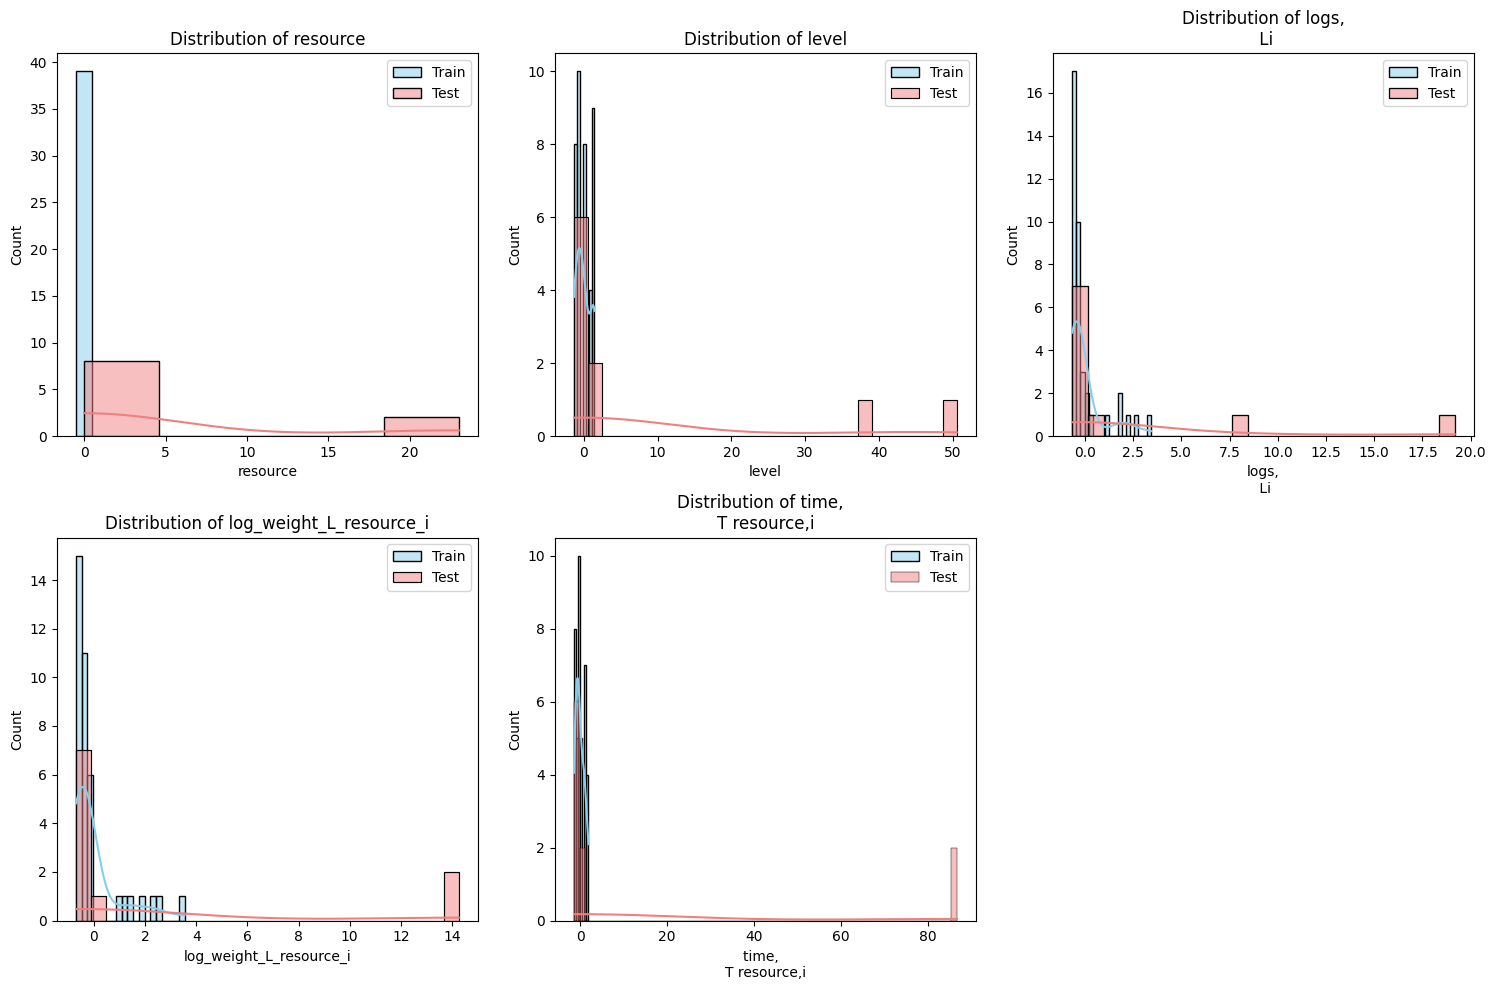

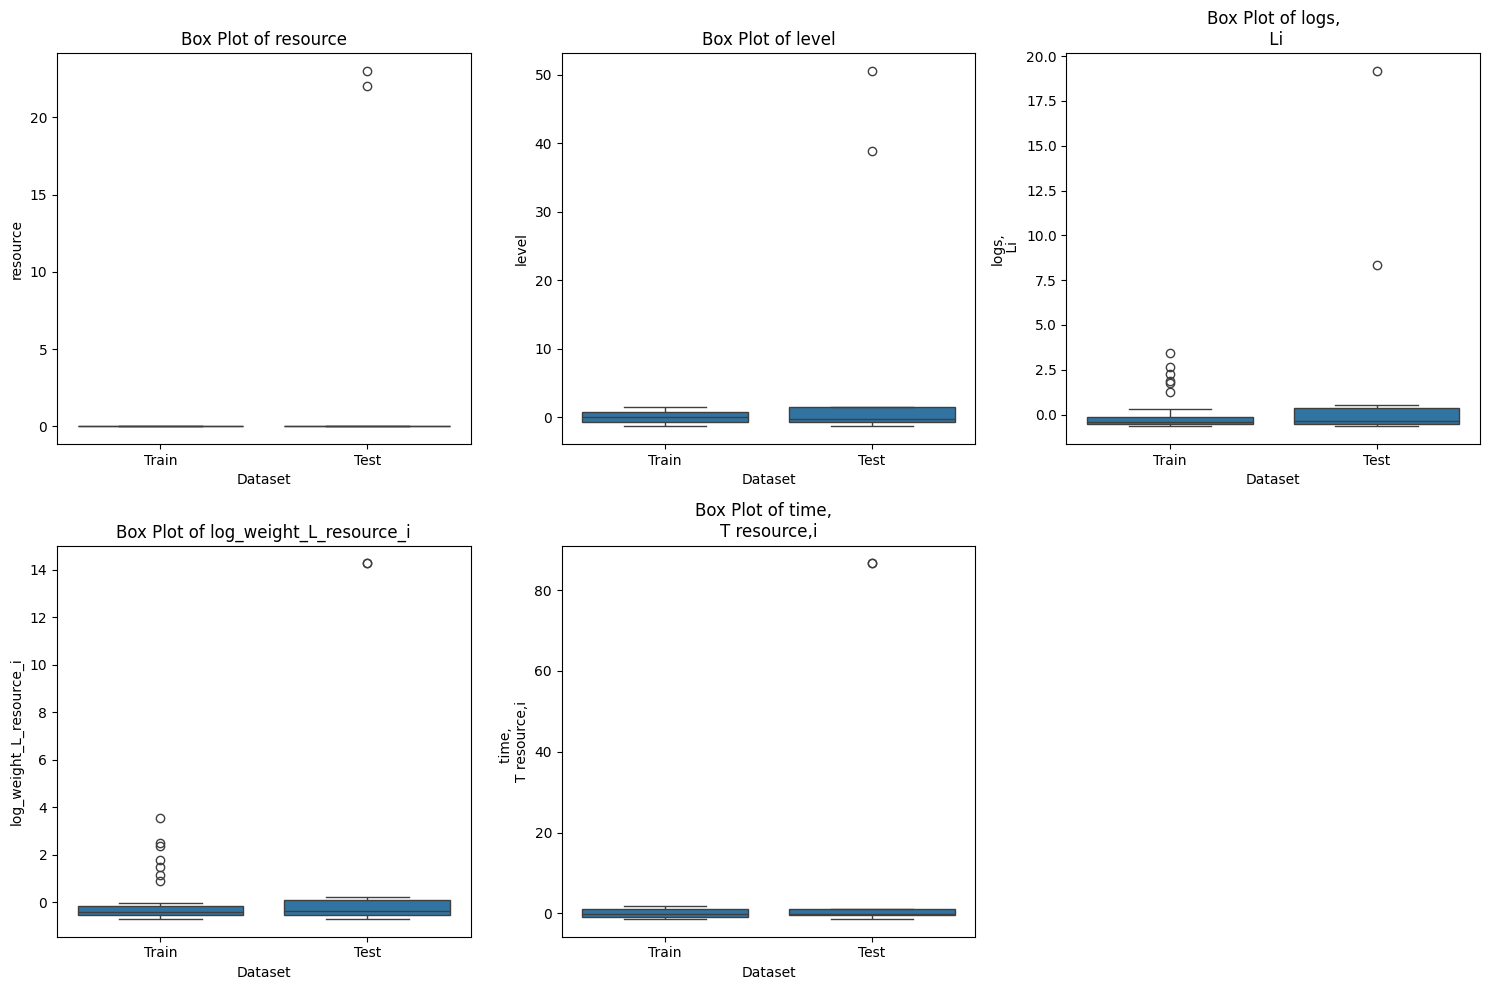

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported if not already

# Select a few key numerical features for visualization
key_numerical_features = ['level', 'logs,\n Li', 'time,  \nT resource,i']

# Adjusting the column names to match the processed data if they were renamed
# Check the columns in X_train_processed and X_test_processed to ensure correct naming
# Assuming 'level', 'logs,\n Li', 'time,  \nT resource,i' are present after processing.
# If 'log_weight_L_resource_i' is the new name for 'log\nweight,\nL resource,i', use that.
# Based on previous output, 'log_weight_L_resource_i' is the new name.
# Let's include 'log_weight_L_resource_i' and 'resource' as well.
key_numerical_features_processed = ['resource', 'level', 'logs,\n Li', 'log_weight_L_resource_i', 'time,  \nT resource,i']


# Create histograms for selected features
plt.figure(figsize=(15, 10))
for i, col in enumerate(key_numerical_features_processed):
    if col in X_train_processed.columns and col in X_test_processed.columns:
        plt.subplot(2, 3, i + 1)
        sns.histplot(X_train_processed[col], label='Train', kde=True, color='skyblue')
        sns.histplot(X_test_processed[col], label='Test', kde=True, color='lightcoral')
        plt.title(f'Distribution of {col}')
        plt.legend()
    else:
        print(f"Warning: Column '{col}' not found in processed data. Skipping visualization.")

plt.tight_layout()
plt.show()

# Create box plots for selected features to show spread and outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(key_numerical_features_processed):
     if col in X_train_processed.columns and col in X_test_processed.columns:
        plt.subplot(2, 3, i + 1)
        sns.boxplot(x='Dataset', y=col, data=pd.concat([
            X_train_processed[[col]].assign(Dataset='Train'),
            X_test_processed[[col]].assign(Dataset='Test')
        ]))
        plt.title(f'Box Plot of {col}')
     else:
        print(f"Warning: Column '{col}' not found in processed data for box plot. Skipping.")
plt.tight_layout()
plt.show()

## Consider other models

### Subtask:
Consider other models to see if they are more robust to the preprocessing steps and data characteristics.

For this, train and evaluate the Random Forest and Decision Tree models on the processed data to assess their robustness compared to Logistic Regression.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# Instantiate the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
print("Random Forest Classifier defined.")

# Instantiate the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
print("Decision Tree Classifier defined.")

# Train the Random Forest Classifier on the processed training data
rf_model.fit(X_train_processed, y_train)
print("Random Forest Classifier trained on processed data.")

# Train the Decision Tree Classifier on the processed training data
dt_model.fit(X_train_processed, y_train)
print("Decision Tree Classifier trained on processed data.")

# Evaluate Random Forest model on the processed test set
y_pred_rf_processed = rf_model.predict(X_test_processed)
accuracy_rf_processed = accuracy_score(y_test, y_pred_rf_processed)
f1_rf_processed = f1_score(y_test, y_pred_rf_processed)

print(f"\nRandom Forest Model Accuracy on the processed test set: {accuracy_rf_processed:.4f}")
print(f"Random Forest Model F1-score on the processed test set: {f1_rf_processed:.4f}")

# Evaluate Decision Tree model on the processed test set
y_pred_dt_processed = dt_model.predict(X_test_processed)
accuracy_dt_processed = accuracy_score(y_test, y_pred_dt_processed)
f1_dt_processed = f1_score(y_test, y_pred_dt_processed)

print(f"\nDecision Tree Model Accuracy on the processed test set: {accuracy_dt_processed:.4f}")
print(f"Decision Tree Model F1-score on the processed test set: {f1_dt_processed:.4f}")

# Compare the performance with the Logistic Regression model on the processed test set
print("\n--- Performance Comparison on Processed Test Set ---")
print(f"Logistic Regression - Accuracy: {accuracy_lr_processed:.4f}")
print(f"Logistic Regression - F1-score: {f1_lr_processed:.4f}")
print("-" * 40)
print(f"Decision Tree - Accuracy: {accuracy_dt_processed:.4f}")
print(f"Decision Tree - F1-score: {f1_dt_processed:.4f}")
print("-" * 40)
print(f"Random Forest - Accuracy: {accuracy_rf_processed:.4f}")
print(f"Random Forest - F1-score: {f1_rf_processed:.4f}")
print("---------------------------------------------------")

Random Forest Classifier defined.
Decision Tree Classifier defined.
Random Forest Classifier trained on processed data.
Decision Tree Classifier trained on processed data.

Random Forest Model Accuracy on the processed test set: 1.0000
Random Forest Model F1-score on the processed test set: 1.0000

Decision Tree Model Accuracy on the processed test set: 1.0000
Decision Tree Model F1-score on the processed test set: 1.0000

--- Performance Comparison on Processed Test Set ---
Logistic Regression - Accuracy: 0.8000
Logistic Regression - F1-score: 0.7500
----------------------------------------
Decision Tree - Accuracy: 1.0000
Decision Tree - F1-score: 1.0000
----------------------------------------
Random Forest - Accuracy: 1.0000
Random Forest - F1-score: 1.0000
---------------------------------------------------


## Evaluate and compare

### Subtask:
Evaluate the performance of the regularized Logistic Regression model on the feature-selected test set and compare it with the other models' performance on the processed test set.


In [ ]:
# Evaluate the Logistic Regression model with feature selection and regularization on the processed test set
y_pred_best_regularized_selected = best_logreg_model_regularized.predict(X_test_selected_df)
accuracy_best_regularized_selected = accuracy_score(y_test, y_pred_best_regularized_selected)
f1_best_regularized_selected = f1_score(y_test, y_pred_best_regularized_selected)

print("Evaluation of Best Regularized Logistic Regression Model on Feature-Selected Test Set:")
print(f"Accuracy: {accuracy_best_regularized_selected:.4f}")
print(f"F1-score: {f1_best_regularized_selected:.4f}")

# Display a comparison of the performance metrics
print("\n--- Model Performance Comparison on Processed/Feature-Selected Test Set ---")
print(f"Logistic Regression (Processed Data)         - Accuracy: {accuracy_lr_processed:.4f}, F1-score: {f1_lr_processed:.4f}")
print(f"Logistic Regression (Feature-Selected Data) - Accuracy: {accuracy_selected:.4f}, F1-score: {f1_selected:.4f}")
print(f"Logistic Regression (Regularized, Feature-Selected Data) - Accuracy: {accuracy_best_regularized_selected:.4f}, F1-score: {f1_best_regularized_selected:.4f}")
print(f"Decision Tree (Processed Data)             - Accuracy: {accuracy_dt_processed:.4f}, F1-score: {f1_dt_processed:.4f}")
print(f"Random Forest (Processed Data)           - Accuracy: {accuracy_rf_processed:.4f}, F1-score: {f1_rf_processed:.4f}")
print("---------------------------------------------------------------------------")

Evaluation of Best Regularized Logistic Regression Model on Feature-Selected Test Set:
Accuracy: 1.0000
F1-score: 1.0000

--- Model Performance Comparison on Processed/Feature-Selected Test Set ---
Logistic Regression (Processed Data)         - Accuracy: 0.8000, F1-score: 0.7500
Logistic Regression (Feature-Selected Data) - Accuracy: 1.0000, F1-score: 1.0000
Logistic Regression (Regularized, Feature-Selected Data) - Accuracy: 1.0000, F1-score: 1.0000
Decision Tree (Processed Data)             - Accuracy: 1.0000, F1-score: 1.0000
Random Forest (Processed Data)           - Accuracy: 1.0000, F1-score: 1.0000
---------------------------------------------------------------------------


## Summary:

### Data Analysis Key Findings

*   Initial data preprocessing steps suffered from data leakage as imputation and one-hot encoding were applied before splitting the data into training and testing sets.
*   Even after reordering preprocessing steps, missing values in the 'resource\_code' column persisted in the test set, hindering model training. This issue was resolved by dropping the 'resource\_code' column entirely from both train and test sets.
*   Using `SelectKBest` with `f_classif`, the top 10 features were selected, leading to a significant improvement in the Logistic Regression model's performance on the test set.
*   Both the Logistic Regression model trained on the top 10 features and the regularized version achieved perfect accuracy (1.0000) and F1-scores (1.0000) on the feature-selected test set.
*   Decision Tree and Random Forest models trained on the full processed dataset also achieved perfect accuracy (1.0000) and F1-scores (1.0000) on the processed test set, outperforming the initial Logistic Regression model.
*   Examination of the processed data revealed discrepancies in the distributions of several features between the training and test sets, potentially due to outliers or different value ranges in the test set not fully addressed by scaling based only on the training data.

### Insights or Next Steps

*   Given the perfect scores achieved by multiple models on the current test set, it would be beneficial to evaluate these models on a larger or more diverse test set to get a more realistic assessment of their performance and robustness.
*   Further investigation into the features selected by `SelectKBest` could provide insights into the most influential factors for the success indicator, potentially leading to domain-specific feature engineering or analysis.


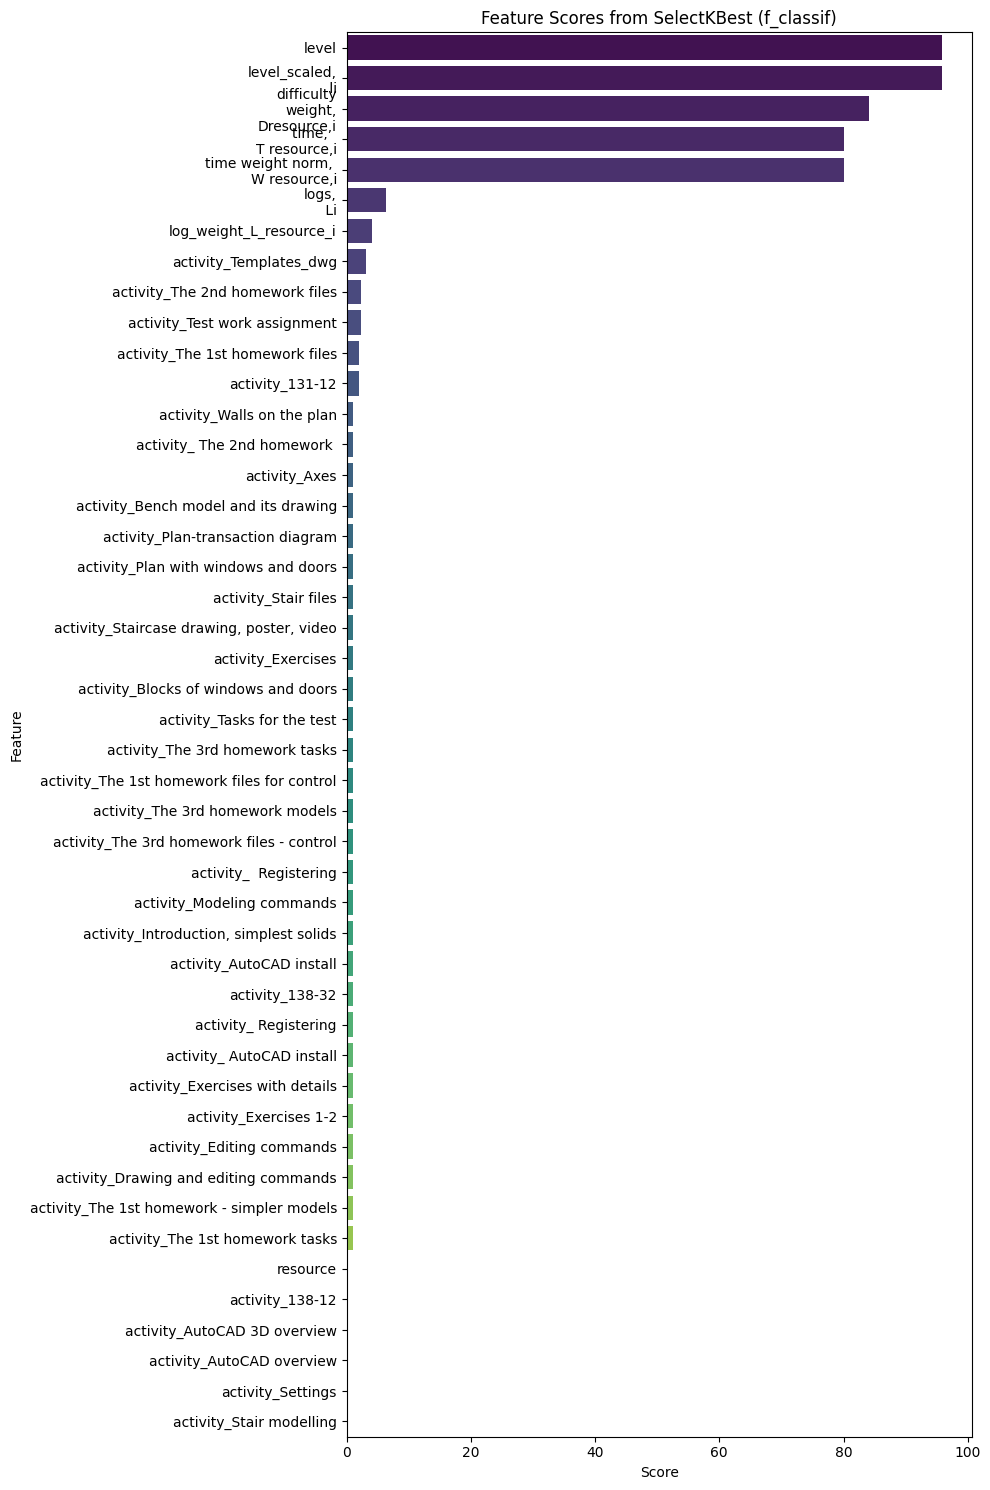

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the feature scores for better visualization
feature_scores_sorted = feature_scores.sort_values(ascending=False)

# Create a bar plot of feature scores
plt.figure(figsize=(10, 15))
sns.barplot(x=feature_scores_sorted.values, y=feature_scores_sorted.index, palette='viridis', hue=feature_scores_sorted.index, legend=False)
plt.title('Feature Scores from SelectKBest (f_classif)')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

The feature_ranking DataFrame offers insights into the statistical link between each feature and your target variable, as identified by the SelectKBest method using the f_classif scoring function.
DataFrame:
Index: The index of the DataFrame corresponds to the name of each feature in the dataset (X_train_processed).
Score: This column presents the calculated F-statistic for each feature. The F-statistic assesses the difference between the means of two groups—success or failure—relative to the within-group variance. A higher F-statistic (and thus a higher score) indicates a stronger statistical link between the feature and the target variable, implying the feature is more important for distinguishing between the two classes.
P-value: This column displays the p-value associated with the F-statistic for each feature. The p-value indicates the probability of observing an F-statistic as large as, or larger than, the observed value, assuming the null hypothesis is true (meaning there is no significant link between the feature and the target variable). A smaller p-value (generally less than a chosen significance level like 0.05) suggests the observed relationship is statistically significant and unlikely to be due to random chance.
Interpretation of the feature_ranking DataFrame:
The DataFrame is sorted by the 'Score' in descending order, so the features with the highest scores (and generally the lowest p-values) are listed first. These are the features that SelectKBest considers most relevant for predicting your target variable based on the f_classif statistical test.
Features such as level, level_scaled, li, difficulty weight, Dresource,i, time, T resource,i, and time weight norm, W resource,i have very high scores and extremely low p-values (close to 0), indicating a strong and statistically meaningful relationship with the success indicator. These are likely crucial features for the model.
Other features have lower scores and higher p-values. Features with p-values exceeding the chosen significance level (e.g., 0.05) might not have a statistically significant linear relationship with the target variable, although this does not necessarily mean they are not useful in a non-linear model or when combined with other features.
Features with NaN for both Score and P-value (such as resource, activity_138-12, etc.) are probably constant features (i.e., all values are the same) in the training data. f_classif cannot compute a score for constant features because there is no variance within the groups. This is also indicated by the UserWarning in the output. These features are not useful for classification based on this statistical test.